### Stock Buy/Sell Prediction
In this mini-project - You will be working with real stock data pulled through the alpaca.markets api. We will provide you starter code below - So you can get started with using the API. You have about 2 weeks to work on this mini-project. Please get started early as identifying good strategies can take time. Good luck and have fun in the process!

### Logistics
Please work in groups of 2 - This is a requirement for this project. Your submission will include one submission of all the training code, back testing code, plots, requirements as outlined below + breakdown of contributions by each member of the project. Please make sure each member in your team tries out new trading strategies/algorithms and does coding as a way of contributing to the project. Also working in teams is a great way to brainstorm, collaborate and improve on your winning strategies.

### Question 1
1. Pick any 5 tech stocks that have had a good performance year-over-year in the past year. You can look up NASDAQ tech stocks list or pick your favorites.

AAPL- Apple Inc. Common Stock

MSFT- Microsoft Corporation Common Stock

GOOG- Alphabet Inc. Class C Capital Stock

AMZN - Amazon.com, Inc. Common Stock

TSLA - Tesla, Inc. Common Stock

2. Download the "closing price" and "opening price" data for each day of the 5 tech stocks over the past year using the ALPACA api (see below for starter code).
1. Train at least 2 baselines (from the lecture - e.g. SMA, EMA) AND one or more ML based models (e.g. STL or supervised learning) on first 7 months of the data set
1. Back-test your buy-sell strategy on the recent past 5 months for each of the 5 stocks you picked. Assume you are not doing day-trading - So you can't sell the stock the same day you bought them. Also assume that you are buying at closing time but can sell at opening or closing time. 
1. Implement your back-testing as an automatic trading mechanism (Algorithmic Trading) - I.e. buy when you have cash available if your algorithm says buy. And sell a bought stock if your algorithm says sell. Make sure, you have a profit margin of at least 0.5%
1. Also implement your back-testing across the 5 stocks - I.e. buy/sell which ever stock is more appealing to your algorithm/trading strategy.
1. Once you initiate the back-test - Your algorithm should be able to automatically buy and sell multiple times across the back-testing period (5 months). This is an example of Algorithmic trading - Where you don't have to initiate buy/sell order but the algorithm would do it for you. Avoid a buy-sell period that contains an Earnings day in it. E.g. GOOG has earnings day on Feb 1 - Avoid a buy before Feb 1 that gets sold after Feb 1. This is to not have your backtest be skewed by wind-falls or heavy losses at earnings.
1. Use classes and modules to organize your training, back-testing, paper-trading and plotting code - See starter code for an example of methods to do paper-trading. 
1. Plot the time-series of the stocks over past 5 months and indicate using markers where your algorithm buys and sells
1. What's the total profit of your strategies. Create a table with strategy and total profit and also percentage profit as your columns. Which is your best strategy ? 
1. What other evaluation metrics make sense for backtest?
1. Also mention the insights/take-aways you gaind by working through this mini-project.

### Question 2
This one is on live paper trading. Take one of your best strategies from Question 1 and run it for 7-10 days (run it live) on the 5 stocks you picked. You can use the buy/sell order methods mentioned in starter code as an example to place orders for live paper trading. So your algorithm is automatically trading live but only on paper. Make sure, the settings for your algorithm enable you to buy and sell within the week (i.e. set your profit margin lower for sell). What's the profit you made?

### Question 3
We will also likely have a Kaggle contest a week into this mini-project where you can test your best back-trading strategies on new stocks - More on this next week!

### Starting points
1. Checkout alpaca.markets and create an account for yourself
1. Generate a key and pass for you to query alpaca.markets for paper trading
1. Checkout the colab interface that Alpaca has for you and what functionalities it has to offer. See example: https://alpaca.markets/learn/google-colab-instant-development-environments/
1. Checkout the docs for Alpaca api
1. Starter code below to get you started 

### Starter Code

In [ ]:
!pip install alpaca_trade_api

     |████████████████████████████████| 45 kB 2.1 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
     |████████████████████████████████| 1.3 MB 42.3 MB/s 
     |████████████████████████████████| 636 kB 7.4 MB/s 
     |████████████████████████████████| 273 kB 13.8 MB/s 
     |████████████████████████████████| 103 kB 27.6 MB/s 
     |████████████████████████████████| 271 kB 51.0 MB/s 
     |████████████████████████████████| 94 kB 2.8 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: msgpack
    Found existing installation: msgpack 1.0.3
    Uninstalling msgpack-1.0.3:
      Successfully uninstalled msgpack-1.0.3


In [ ]:
!pip install backtrader
!pip install alpaca-backtrader-api

     |████████████████████████████████| 410 kB 24.0 MB/s 
     |████████████████████████████████| 147 kB 45.9 MB/s 
     |████████████████████████████████| 11.3 MB 44.3 MB/s 
     |████████████████████████████████| 12.8 MB 45.1 MB/s 
     |████████████████████████████████| 15.7 MB 286 kB/s 
  Created wheel for exchange-calendars: filename=exchange_calendars-3.4-py3-none-any.whl size=179564 sha256=464e0d7aa88053e5ce56ed54749f18906352b1af7ddc12762c01e9fbc40b3462
  Stored in directory: /root/.cache/pip/wheels/7c/ba/85/1819a0f65360ce0276efe87bc37a7c0681bcbedde4582c7ce0
Successfully built exchange-calendars
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
  

In [7]:
import time 
import alpaca_trade_api as alpaca 
import backtrader as bt
import threading
import logging
import json
from alpaca_trade_api.rest import REST, TimeFrame
from alpaca_trade_api.stream import Stream
import numpy as np
ENDPOINT="https://paper-api.alpaca.markets"
API_KEY_ID="PKLEI5N66PII1BBUX5MZ"
SECRET_KEY="324C0qTYFlT632L5S3h1rH4sBRwTYgX7CBOxcGFk"
rest_api = REST(API_KEY_ID, SECRET_KEY, 'https://paper-api.alpaca.markets')

class TradingStrategy:
    def __init__(self,STOCK):
        self.api = alpaca.REST(API_KEY_ID, SECRET_KEY, ENDPOINT)
        self.STOCK = STOCK
        self.SELL_LIMIT_FACTOR = 1.01 # 1 percent margin

        self.stop_loss = 3
        self.EXISTING_QUANTITY = 0
        self.NEW_QUANTITY = 0
        self.SLEEP_BUY_LIMIT_ORDER = 300

        self.days = 90
        self.time_list = []

        self.mode = 'test'
        self.get_past_closing_prices(self.days)
        self.get_past_opening_prices(self.days)
        self.get_date(self.mode)
        self.buy = 0
        self.data = []

        # self.trade_hyperparameters()
        
        # Anything else you want to initialize or a method you want to
        # call during initialization of class - Feel free to add
        
        # Get past 90 days closing prices
        self.get_past90_closing_prices()
        self.high = 0 
        self.low = 0
        self.close = 0
        self.buy_sell_strategy(self.data)
        # self.get_all_price(self.days)
        # self.get_volume(self.days)
        self.price_list = []

    # def trade_hyperparameters(self):
    #   percentage_buy  = {'market':0, '1':0.3, '7':0.5,'30':1,'60':1,'90':1}
    #   percentage_sell =  {'market':1, '1':1.5, '7':2,'30':3,'60':3,'90':3.5}
    #   self.BUY_LIMIT_FACTOR = {}
    #   self.SELL_LIMIT_FACTOR = {}
    #   for buy_strategy in percentage_buy:
    #     self.BUY_LIMIT_FACTOR[buy_strategy] = 1 + percentage_buy[buy_strategy]/100
    #     # self.SELL_LIMIT_FACTOR[sell_strategy] = 1 + percentage_sell[sell_strategy]/100

    def get_past_closing_prices(self, days):  
        barset = self.api.get_barset(self.STOCK, 'day', limit= days) 
        bars = barset[self.STOCK]
        self.past_closing_prices = [bars[index].c for index in range(len(bars))]
        return self.past_closing_prices

    def get_past90_closing_prices(self):  
        barset = self.api.get_barset(self.STOCK, 'day', limit= 90) 
        bars = barset[self.STOCK]
        self.past_closing_prices = [bars[index].c for index in range(len(bars))]
        return self.past_closing_prices

    def get_past365_closing_prices(self):
        barset = self.api.get_barset(self.STOCK, 'day', limit=365).df
        bars = barset[self.STOCK]
        # past365_closing_prices = [bars[index].c for index in range(len(bars))]
        return barset
    
    def get_past_opening_prices(self, days):  
        barset = self.api.get_barset(self.STOCK, 'day', limit= days) 
        bars = barset[self.STOCK]
        self.past_opening_prices = [bars[index].o for index in range(len(bars))]
        self.past_opening_prices_time = [bars[index].t for index in range(len(bars))]
        return self.past_opening_prices

    # def get_all_price(self, days):
    #     barset = self.api.get_barset(self.STOCK, 'day', limit= days) 
    #     bars = barset[self.STOCK]
    #     self.opening_prices = [bars[index].o for index in range(len(bars))]
    #     self.closing_prices = [bars[index].c for index in range(len(bars))]
    #     self.high_price = [bars[index].h for index in range(len(bars))]
    #     self.low_price = [bars[index].l for index in range(len(bars))]
    #     self.all_list = [self.opening_prices, self.closing_prices, self.high_price, self.low_price]
    #     return self.all_list

    # def get_volume(self, days):
    #     barset = self.api.get_barset(self.STOCK, 'day', limit= days) 
    #     bars = barset[self.STOCK]
    #     self.vol = [bars[index].v for index in range(len(bars))]
    #     return self.vol

    def buy_sell_strategy(self, data):
        signal = 0
        buy_list = []
        sell_list = []
        trade_list = []
        flag_long = False
        flag_short = False
        for i in range(len(data)):
          if data['Middle'][i]< data['Long'][i] and data['Short'][i]< data['Middle'][i] and flag_long == False and flag_short == False:
                if signal != 1:
                        buy_list.append(data['close'][i])
                        sell_list.append(np.nan)
                        flag_short = True
                        temp = 1
                        signal = 1
                        trade_list.append(signal)
                else: 
                        buy_list.append(np.nan)
                        sell_list.append(np.nan)
                        trade_list.append(0)
                        flag_short = True
          elif flag_short == True and data['Short'][i]>data['Middle'][i]:
                if signal != -1:
                        sell_list.append(data['close'][i])
                        buy_list.append(np.nan)
                        flag_short = False
                        signal = -1
                        trade_list.append(signal)
                else: 
                        buy_list.append(np.nan)
                        sell_list.append(np.nan)
                        trade_list.append(0)
                        flag_short = False
          elif data['Middle'][i]> data['Long'][i] and data['Short'][i]> data['Middle'][i] and flag_long == False and flag_short == False:
                if signal != 1:
                        buy_list.append(data['close'][i])
                        sell_list.append(np.nan)
                        flag_long = True
                        temp = 1
                        signal = 1
                        trade_list.append(signal)
                else: 
                        buy_list.append(np.nan)
                        sell_list.append(np.nan)
                        trade_list.append(0)
                        flag_lomg = True
          elif flag_long == True and data['Short'][i]<data['Middle'][i]:
                if signal != -1:
                        sell_list.append(data['close'][i])
                        buy_list.append(np.nan)
                        flag_long = False
                        signal = -1
                        trade_list.append(signal)
                else: 
                        buy_list.append(np.nan)
                        sell_list.append(np.nan)
                        trade_list.append(0)
                        flag_long = False
          else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
            trade_list.append(0)
        return buy_list, sell_list, trade_list
    
    # def get_date(self, mode):
    #     if mode == 'test':
    #       date = self.past_opening_prices_time
    #       self.time_list = [x.date() for x in date]
    #     else:
    #       date = self.past_opening_prices_time
    #       self.time_list = [x.date() for x in date]
    #       self.time_list = pd.DatetimeIndex(self.time_list, yearfirst= True)
    #     return self.time_list

    def all_EMA(data):
        data['EMA25'] = data.close.ewm(span = 25, adjust = False).mean()
        data['EMA50'] = data.close.ewm(span = 50, adjust = False).mean()
        data['Signal'] = np.where(data['EMA25'] > data['EMA50'], 1, 0)
        data['Position'] = data['Signal'].diff()
        data['Buy_EMA'] = np.where(data['Position'] == 1, data['close'], np.nan)
        data['Sell_EMA'] = np.where(data['Position'] == -1, data['close'], np.nan)
        return data

    def live_signals(self):
        s7_day_ema = min(self.past90_closing_prices[-7:])
        t21_day_ema = min(self.past90_closing_prices[-21:])
        s63_day_ema = min(self.past90_closing_prices[-63:])
        signal = 0 
        if t21_day_ema<s63_day_ema and s7_day_ema<t21_day_ema: 
          signal = -1
        elif t21_day_ema>s63_day_ema and s7_day_ema>t21_day_ema:
          signal = 1
        
        return signal
    
    def get_current_price(self):
        return float(self.api.get_last_trade(self.STOCK).price)
    
    # def get_quantity_buy(self):
    #     if int(float(self.api.get_account().cash)) > 0:
    #         return int((float(self.api.get_account().cash)/2) \
    #                    /self.get_current_price())
    #     else:
    #         return 0
    
    def get_quantity_buy(self):
        if int(float(self.api.get_account().cash)) > 0:
              principal = float(self.api.get_account().cash)
              price = float(self.get_current_price())
              amount = principal * 0.3
              if amount//price == 0:
                amount = principal * 0.6
              if principal//price == 0:
                amount = principal
              num_stock = int(amount/price)
              return num_stock
        else:
            return 0
        
    def exists_buy_order(self):
        # Identifies if a buy order exists for a stock
        orders = self.api.list_orders()
        for order in orders:
            if order.side=="buy" and order.symbol==self.STOCK:
                return True
        
        return False
    
    def have_bought_stock(self):
        positions=self.api.list_positions()
        for position in positions:
            if position.symbol==self.STOCK and int(position.qty)==self.NEW_QUANTITY + self.EXISTING_QUANTITY:
                return True
        return False
        
        
    def get_buy_price(self):
        # Identify the buying price for a stock
        positions=self.api.list_positions()
        for position in positions:
            if position.symbol==self.STOCK:
                return float(position.cost_basis)/int(position.qty)
    
    
    def buy_market_order(self):
        # Buy the stock at market price (This is for paper-trading)
        if self.NEW_QUANTITY > 0:
            self.api.submit_order(self.STOCK, \
                        qty=self.NEW_QUANTITY,\
                        side="buy",\
                        type="market", \
                        time_in_force="day",
                        order_class=None)
            self.price_list.append(self.get_current_price()*self.NEW_QUANTITY)
        
    # def buy_limit_order(self,base_price):
    #     self.BUY_LIMIT_PRICE = base_price + self.BUY_LIMIT_FACTOR
    #     if self.NEW_QUANTITY>0:
    #       self.api.submit_order(self.STOCK, self.NEW_QUANTITY, 'buy', 'limit', 'day', self.BUY_LIMIT_PRICE)
        
    # def sell_limit_order(self):
    #     self.api.submit_order(self.STOCK, self.NEW_QUANTITY, 'sell', 'limit', 'gtc', self.SELL_LIMIT_PRICE)
        
    # def identify_strategy_for_selling(self):
    #     current_price = get_current_price()
    #     ninety_day_min = min(self.past90_closing_prices)
    #     sixty_day_min = min(self.past90_closing_prices[-60:])
    #     thirty_day_min = min(self.past90_closing_prices[-30:])
    #     seven_day_min = min(self.past90_closing_prices[-7:])
    #     perv_day_min = min(self.past90_closing_prices[-2:])
    #     if current_price < self.BUY_LIMIT_FACTOR['90']*ninety_day_min:
    #       self.strategy = "ninety_day"
    #     elif current_price < self.BUY_LIMIT_FACTOR['60']*sixty_day_min:
    #       self.strategy = "sixty_day"
    #     elif current_price < self.BUY_LIMIT_FACTOR['30']*thirty_day_min:
    #       self.strategy = "thirty_day"
    #     elif current_price < self.BUY_LIMIT_FACTOR['7']*seven_day_min:
    #       self.strategy = "seven_day"
    #     else:
    #       self.strategy = "EXIT" 

    def identify_strategy_for_selling(self):
        # If you have multiple strategies
        # Pick between them here - Or use ML to help identify 
        # your strategy
        tempProfit = (self.get_current_price() * self.EXISTING_QUANTITY) - sum(self.price_list)
        if (tempProfit >= (0.1*sum(self.price_list)))  and (self.live_signals() == 0 and self.NEW_QUANTITY>0):
          self.api.submit_order(self.STOCK, self.NEW_QUANTITY, side='sell', type='market', time_in_force='day')
          self.price_list = []
        
    def market_buy_strategy(self):
        # Providing a simple trading strategy here:
        # Buy at market price if conditions are favorable for buying
        # Sell at a limit price that is determined based on buying price
        # This strategy doesn't use any ML here - You may want to use
        # appropriate libraries to train models + use the trained strategy 
        # here
        
        # Get existing quantity
        positions = self.api.list_positions()
        self.EXISTING_QUANTITY = 0
        for position in positions:
            if position.symbol == self.STOCK:
                self.EXISTING_QUANTITY += int(position.qty)
                
        # MARKET BUY order
        self.NEW_QUANTITY=self.get_quantity_buy()
        
        if self.NEW_QUANTITY == 0:
            return "ZERO EQUITY"
        
        if not self.exists_buy_order():
            self.buy_market_order()
            
        
        # BRACKET SELL order
        # Initiate sell order if stock has been bought
        # If not, wait for it to be bought
        while not self.have_bought_stock():
            #print(self.api.positions)
            #print(self.NEW_QUANTITY + self.EXISTING_QUANTITY)
            time.sleep(1)
        
        if self.have_bought_stock():
            buy_price=self.get_buy_price()
            self.SELL_LIMIT_PRICE=int(float(buy_price))*self.SELL_LIMIT_FACTOR
            
            # Initiate Sell order
            self.sell_limit_order()
    
    # def generic_bracket_order(self, buy_type, base_price_strategy):
    #     if base_price_strategy == 'market':
    #       pass
    #     elif base_price_strategy == 'previous_day_close':
    #       base_price = min(self.past_30_closing_price[-2:])
    #     elif base_price_strategy == 'seven_day_min_close':
    #       base_price = min(self.past_30_closing_price[-7:])
    #     elif base_price_strategy == 'thirty_day_min_close':
    #       base_price = min(self.past_30_closing_price[-30:])
        
    #     self.get_existing_quantity()
    #     self.get_new_quantity_buy()

    #     if base_price_strategy == 'market':
    #       self.buy_market_order()
    #     else:
    #       self.buy_limit_price(base_price)

    #     while not self.have_bought_stock():
    #       time.sleep(self.SLEEP_BUY_LIMIT_ORDER)
        
    #     if self.have_bought_stock():
    #        buy_price = self.get_buy_price()
    #        print("Buy Price = ", buy_price)
    #        self.SELL_LIMIT_PRICE = int(float(buy_price))*self.SELL_LIMIT_FACTOR
          
    #        self.sell_limit_order()
    
    # def Strategy_BuyMarket_SellStrategic(self):
    #     self.indentify_strategy_for_selling()
    #     if self.strategy == "EXIT":
    #       print("NO TRADE TODAY!")
    #       return
    #     elif self.strategy == "seven_day":
    #       print("7 day strategy")
    #     self.buy_market_order()
    #     while not self.haave_bought_stock():
    #       time.sleep(self.SLEEP_BUY_LIMIT_ORDER)
    #     if self.have_bought_stock():
    #       buy_price = self.get_buy_price()
    #       print("BUY PRICE = ", buy_price)
    #       self.SELL_LIMIT_PRICE = int(float(buy_price))*self.SELL.LIMIT.FACTOR
          
    #       self.sell_limit_order()


    # def previous_day_close_strategy(self):
    #     previous_close = self.previous_closing_price()
    #     self.QUANTITY = self.get_quantity_buy()
    #     if not self.exists_buy_order():
    #         self.BUY_LIMIT_PRICE = previous_close * self.BUY_LIMIT_FACTOR

    #     while not self.have_bought_stock():
    #       time.sleep(5)
    #     if self.have_bought_stock():
    #       buy_price = self.get_buy_price()
    #       self.SELL_LIMIT_PRICE = buy_price*self.SELL_LIMIT_FACTO
  
    # def your_best_strategy(self):
    #     # Implement here or add other methods to do the same
    #     pass

In [12]:
# Get an instance of your class 
strategy = TradingStrategy('GOOG')
strategy.market_buy_strategy() # Initiates a market buy and limit sell order
# This will accept a order only during market hours. However you can 
# use the market data api outside hours

'ZERO EQUITY'

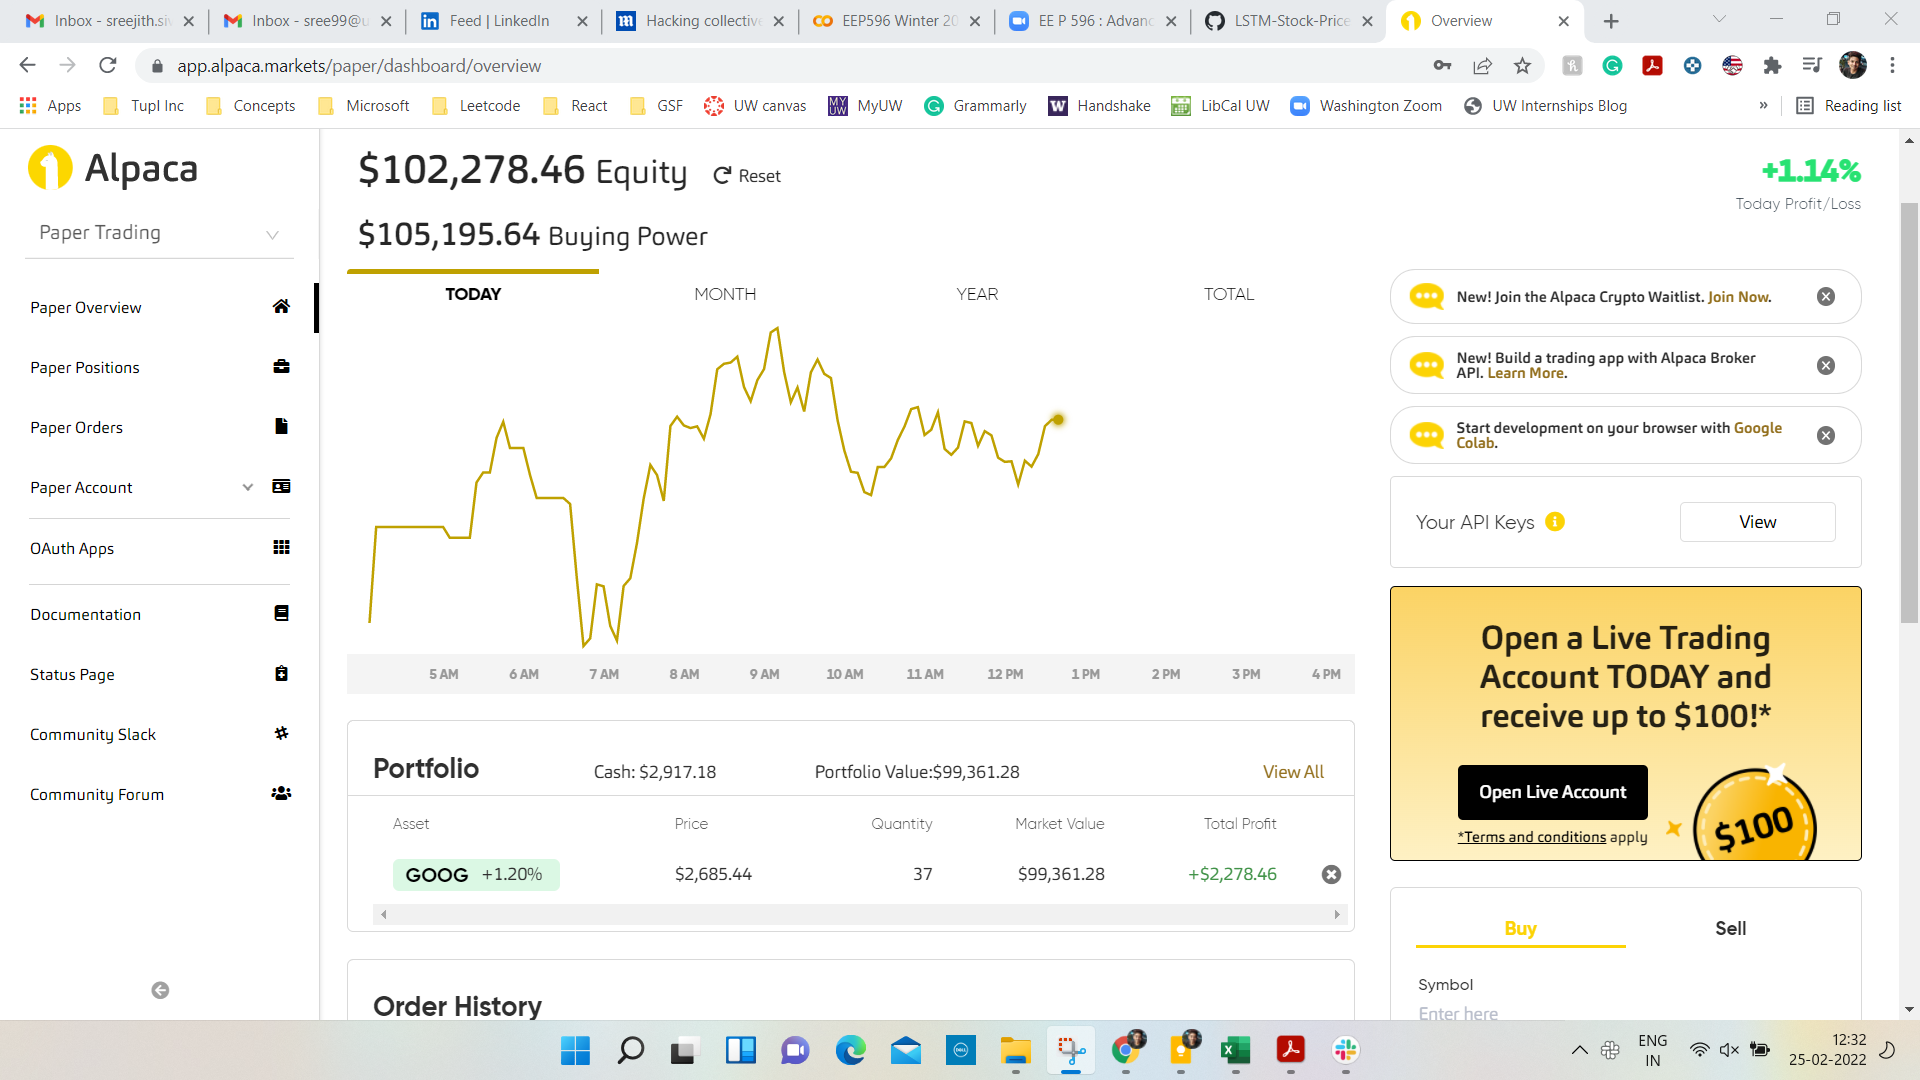

The strategies experimented, backtesting, code and analysis are given in different sections of the notebook below.

In [ ]:
strategy.get_past365_closing_prices()

GOOG                                        
                              open       high        low    close   volume
time                                                                      
2020-09-15 00:00:00-04:00  1536.00  1559.5700  1531.8350  1542.62   985004
2020-09-16 00:00:00-04:00  1555.54  1562.0000  1519.8200  1520.85  1109624
2020-09-17 00:00:00-04:00  1496.00  1508.2983  1470.0001  1495.93  1530177
2020-09-18 00:00:00-04:00  1498.01  1503.0032  1437.1300  1459.99  2645555
2020-09-21 00:00:00-04:00  1440.06  1448.3600  1406.5500  1431.92  2690124
...                            ...        ...        ...      ...      ...
2022-02-17 00:00:00-05:00  2723.66  2736.7900  2644.0400  2646.17  1213698
2022-02-18 00:00:00-05:00  2661.71  2676.4800  2606.1404  2610.20  1301776
2022-02-22 00:00:00-05:00  2595.21  2638.0150  2554.8200  2588.24  1634782
2022-02-23 00:00:00-05:00  2621.57  2634.9800  2550.0700  2551.70  1041853
2022-02-24 00:00:00-05:00  2496.25  2583.7450  2495.2900  2562.59   938864

[365 rows x 5 columns]

In [ ]:
# Question 1 (2)

In [ ]:
from google.colab import files

choice = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA']
for i in choice:
  strategy = TradingStrategy(i)
  df = strategy.get_past365_closing_prices()
  fil_name = "df_"+i
  # df.to_csv(fil_name, encoding = 'utf-8-sig') 
  path = '/content/'+fil_name
  with open(path, 'w', encoding = 'utf-8-sig') as f:
    df.to_csv(f)
  # files.download(fil_name)

The cells below contain the implementation of five baselines and two proposed strategies. The descriptions and analysis of the results are provided in the end of the notebook.

# EXPONENTIAL MOVING AVERAGE

In [ ]:
# Question 1 (3)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
local_file="/content/df_AAPL"
df = pd.read_csv(local_file,sep=',',engine='python',error_bad_lines=False, header = [0])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# df = df.set_index(pd.DatetimeIndex(df['time'].values))
df

,time,open,high,low,close,volume
0,2020-09-10 00:00:00-04:00,119.50,120.0500,112.50,113.4800,141520456
1,2020-09-11 00:00:00-04:00,114.57,115.2300,110.00,112.0100,168935205
2,2020-09-14 00:00:00-04:00,114.72,115.9300,112.80,115.3599,123728990
3,2020-09-15 00:00:00-04:00,118.33,118.8290,113.61,115.5500,171497919
4,2020-09-16 00:00:00-04:00,115.23,116.0000,112.04,112.1300,142859370
...,...,...,...,...,...,...
360,2022-02-14 00:00:00-05:00,167.37,169.5800,166.56,169.1300,64590666
361,2022-02-15 00:00:00-05:00,170.99,172.9500,170.25,172.8000,51878759
362,2022-02-16 00:00:00-05:00,171.82,173.3400,170.05,172.5500,50239943
363,2022-02-17 00:00:00-05:00,171.15,171.9100,168.47,168.9200,55763565


<function matplotlib.pyplot.show>

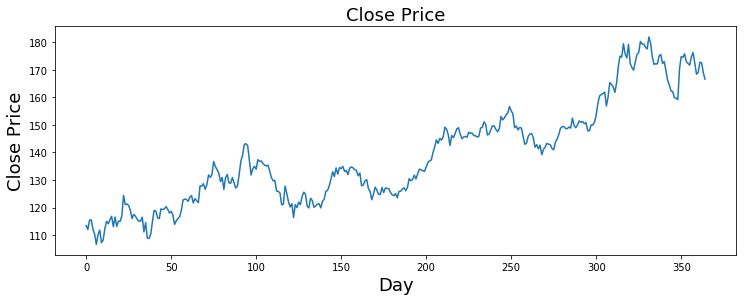

In [ ]:
plt.figure(figsize=(12.2, 4.2))
plt.title('Close Price', fontsize = 18)
plt.plot(df['close'])
plt.xlabel('Day', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.show

In [ ]:
EMA20 = df.close.ewm(span = 20, adjust = False).mean()
EMA60 = df.close.ewm(span = 60, adjust = False).mean()

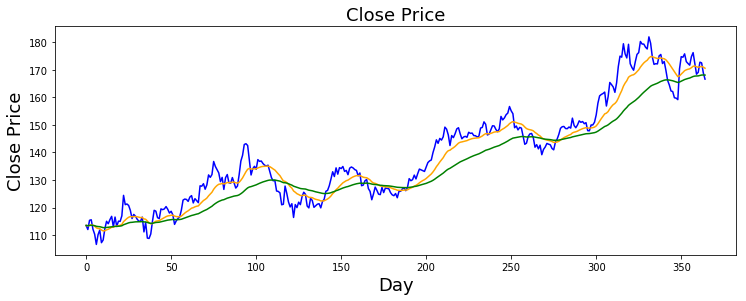

In [ ]:
plt.figure(figsize=(12.2, 4.2))
plt.title('Close Price', fontsize = 18)
plt.plot(df['close'], label = 'Close Price', color= 'blue')
plt.plot(EMA20, label = 'Short EMA', color= 'orange')
plt.plot(EMA60, label = 'Long EMA', color= 'green')
plt.xlabel('Day', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.show()

In [ ]:
df['Short'] = EMA20
df['Long'] = EMA60
df

,time,open,high,low,close,volume,Short,Long
0,2020-09-10 00:00:00-04:00,119.50,120.0500,112.50,113.4800,141520456,113.480000,113.480000
1,2020-09-11 00:00:00-04:00,114.57,115.2300,110.00,112.0100,168935205,113.340000,113.431803
2,2020-09-14 00:00:00-04:00,114.72,115.9300,112.80,115.3599,123728990,113.532371,113.495020
3,2020-09-15 00:00:00-04:00,118.33,118.8290,113.61,115.5500,171497919,113.724527,113.562396
4,2020-09-16 00:00:00-04:00,115.23,116.0000,112.04,112.1300,142859370,113.572667,113.515432
...,...,...,...,...,...,...,...,...
360,2022-02-14 00:00:00-05:00,167.37,169.5800,166.56,169.1300,64590666,170.941279,167.822175
361,2022-02-15 00:00:00-05:00,170.99,172.9500,170.25,172.8000,51878759,171.118300,167.985383
362,2022-02-16 00:00:00-05:00,171.82,173.3400,170.05,172.5500,50239943,171.254653,168.135042
363,2022-02-17 00:00:00-05:00,171.15,171.9100,168.47,168.9200,55763565,171.032305,168.160779


In [ ]:
df['Signal_EMA'] = np.where(df['Short'] > df['Long'], 1, 0)
df['Position_EMA'] = df['Signal_EMA'].diff()
df['Buy_EMA'] = np.where(df['Position_EMA'] == 1, df['close'], np.NAN)
df['Sell_EMA'] = np.where(df['Position_EMA'] == -1, df['close'], np.NAN)

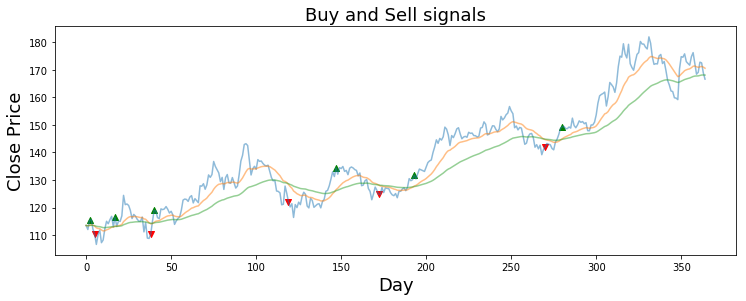

In [ ]:
plt.figure(figsize=(12.2, 4.2))
plt.title('Buy and Sell signals', fontsize = 18)
plt.plot(df['close'], alpha = 0.5, label = 'Close')
plt.plot(df['Short'], alpha = 0.5, label = 'EMA20')
plt.plot(df['Long'], alpha = 0.5, label = 'EMA50')
plt.scatter(df.index, df['Buy_EMA'], color = 'green', marker = '^', alpha= 1, label = 'Buy Signal')
plt.scatter(df.index, df['Sell_EMA'], color = 'red', marker = 'v', alpha= 1, label = 'Sell Signal')
plt.xlabel('Day', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.show()

# SIMPLE MOVING AVERAGE

In [ ]:
def SMA(data, period = 30, column= 'close'):
  return data[column].rolling(window=period).mean()

In [ ]:
df['SMA20'] = SMA(df, 20)
df['SMA50'] = SMA(df, 50)

In [ ]:
df['Signal'] = np.where(df['SMA20'] > df['SMA50'], 1, 0)
df['Position'] = df['Signal'].diff()
df['Buy_SMA'] = np.where(df['Position'] == 1, df['close'], np.NAN)
df['Sell_SMA'] = np.where(df['Position'] == -1, df['close'], np.NAN)

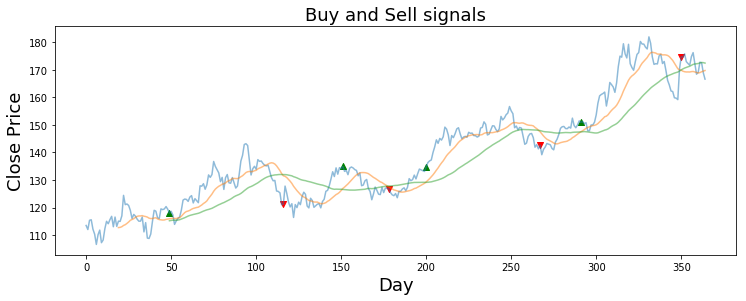

In [ ]:
plt.figure(figsize=(12.2, 4.2))
plt.title('Buy and Sell signals', fontsize = 18)
plt.plot(df['close'], alpha = 0.5, label = 'Close')
plt.plot(df['SMA20'], alpha = 0.5, label = 'SMA20')
plt.plot(df['SMA50'], alpha = 0.5, label = 'SMA50')
plt.scatter(df.index, df['Buy_SMA'], color = 'green', marker = '^', alpha= 1, label = 'Buy Signal')
plt.scatter(df.index, df['Sell_SMA'], color = 'red', marker = 'v', alpha= 1, label = 'Sell Signal')
plt.xlabel('Day', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.show()

# Seasonal and Trend decomposition using Loess (STL)

In [ ]:
!pip install statsmodels==0.12.1

     |████████████████████████████████| 9.5 MB 6.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 2.2.5 which is incompatible.


In [ ]:
!pip install cython

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AR
import seaborn as sns

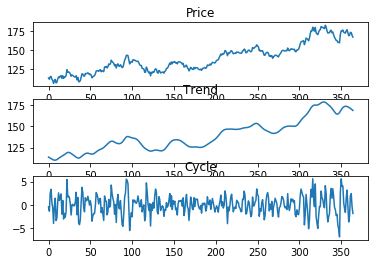

In [ ]:
series = df['close']
# series = series[:-150]
cycle, trend = sm.tsa.filters.hpfilter(series, 50)
fig, ax = plt.subplots(3,1)
ax[0].plot(series)
ax[0].set_title('Price')
ax[1].plot(trend)
ax[1].set_title('Trend')
ax[2].plot(cycle)
ax[2].set_title('Cycle')
plt.show()

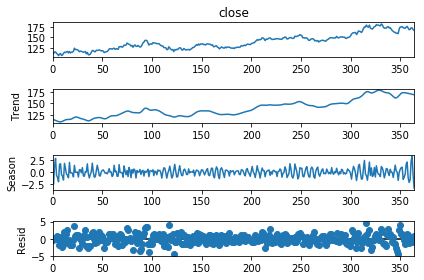

In [ ]:
result = STL(series, period=5).fit()
chart = result.plot()
plt.show()

Test RMSE: 2.67530


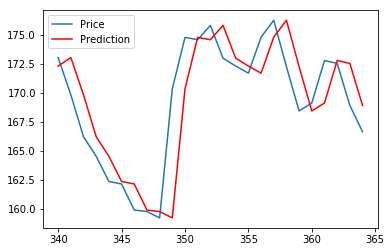

In [ ]:
# series_predict = df['close']
# series_predict = series_predict[len(series_predict)-150:]

predictions = series.shift(1).dropna()
test_score = np.sqrt(mean_squared_error(series[int(len(series) * 0.7)+1:], predictions.iloc[int(len(series) * 0.7):]))
print('Test RMSE: %.5f' % test_score)
plt.plot(series.iloc[-25:], label='Price')
plt.plot(predictions[-25:], color='red', label='Prediction')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


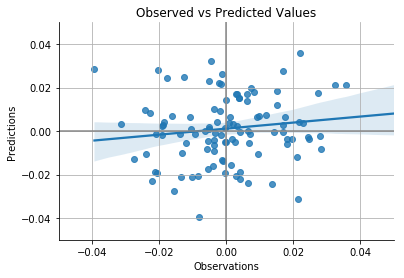

The MAE is 0.0164


In [ ]:
# referance - https://pythonforfinance.net/2019/07/22/time-series-decomposition-prediction-in-python/
fig, ax = plt.subplots()
ax = sns.regplot(series.iloc[-int(len(series) * 0.3):].pct_change(), predictions.iloc[-int(len(series) * 0.3):].pct_change(),)
plt.xlabel('Observations')
plt.ylabel('Predictions')
plt.title('Observed vs Predicted Values')
ax.grid(True, which='both')
ax.axhline(y=0, color='#888888')
ax.axvline(x=0, color='#888888')
sns.despine(ax=ax, offset=0)
plt.xlim(-0.05, 0.05)
plt.ylim(-0.05, 0.05)
plt.show()
mae = round(abs(series.iloc[-int(len(series) * 0.3):].pct_change() - predictions.iloc[-int(len(series) * 0.3):].pct_change()).mean(),4)
print(f'The MAE is {mae}')

In [ ]:
# referance - https://pythonforfinance.net/2019/07/22/time-series-decomposition-prediction-in-python/
price_pred = pd.concat([series.iloc[-int(len(series) * 0.3):].pct_change(), predictions.iloc[-int(len(series) * 0.3):].pct_change()], axis=1)
price_pred.dropna(inplace=True)
price_pred.columns = ['Price', 'preds']
price_pred['hit'] = np.where(np.sign(price_pred['Price']) == np.sign(price_pred['preds']), 1, 0)
print(f"Hit rate: {round((price_pred['hit'].sum() / price_pred['hit'].count()) * 100,2)}%")

Hit rate: 55.56%


# PROPHET

In [ ]:
df_prof = df[['time','close']]
df_prof = df_prof.rename(columns={'time':'ds','close':'y'})

In [ ]:
df_prof['ds'] = [x[:10] for x in df_prof['ds']]
df_prof

,ds,y
0,2020-09-10,113.4800
1,2020-09-11,112.0100
2,2020-09-14,115.3599
3,2020-09-15,115.5500
4,2020-09-16,112.1300
...,...,...
360,2022-02-14,169.1300
361,2022-02-15,172.8000
362,2022-02-16,172.5500
363,2022-02-17,168.9200


In [ ]:
last = df_prof[len(df)-150:]
df_prof = df_prof[:-150]

In [ ]:
from fbprophet import Prophet
fbp = Prophet(daily_seasonality = True)
fbp.fit(df_prof)
future = fbp.make_future_dataframe(periods = 365)
forecast = fbp.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
from fbprophet.plot import plot_plotly
plot_plotly(fbp, forecast)

In [ ]:
forecast[forecast.ds == '2022-02-08']['yhat']

418    186.201645
Name: yhat, dtype: float64

In [ ]:
last[last.ds == '2022-02-08']['y']

356    174.82
Name: y, dtype: float64

# Stochastic Relative Strength Indicator (stochRSI)

In [ ]:
def stochRSI(data, period = 14, column= 'close'):
  delta = data[column].diff(1)
  delta = delta.dropna()
  up = delta.copy()
  down = delta.copy()
  up[up<0] = 0
  down[down>0] = 0
  data['up'] = up
  data['down'] = down
  avg_gain = df.up.ewm(span = 14, adjust = False).mean()
  avg_loss = abs(df.down.ewm(span = 14, adjust = False).mean())
  relative_strength = avg_gain/avg_loss
  rsi = 100.0-(100.0/(1+relative_strength))
  stoch_rsi = (rsi - rsi.rolling(period).min())/(rsi.rolling(period).max()-rsi.rolling(period).min())
  return stoch_rsi

In [ ]:
df['StockRSI'] = stochRSI(df)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 10 Text xticklabel objects>)

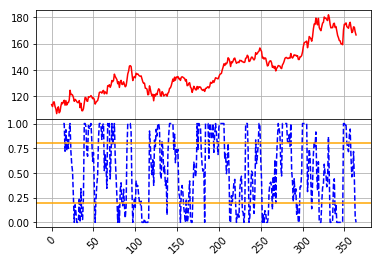

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, sharex = True)
plt.subplots_adjust(hspace = .0)
ax1.grid()
ax2.grid()
ax1.plot(df.index, df['close'], color = 'red')
ax2.plot(df.index, df['StockRSI'], color = 'blue', linestyle = '--')
ax2.axhline(0.20, color = 'orange')
ax2.axhline(0.80, color = 'orange')
plt.xticks(rotation = 45)

# Implementing baselines on all the stocks together (including backtesting and calculating net profit/loss)

In [ ]:
def clean_data(data):
  data['time'] = [x[:10] for x in data['time']]
  data = data.set_index(pd.DatetimeIndex(df['time'].values))
  return data

In [ ]:
files = ['df_AAPL', 'df_AMZN', 'df_GOOG', 'df_MSFT', 'df_TSLA'] 
for i in files:
  filepath = "/content/"+i
  df = pd.read_csv(filepath,sep=',',engine='python',error_bad_lines=False, header = [0])
  df = clean_data(df)
  fil_name = "df_"+i[3:]+"_365"
  path = '/content/'+fil_name
  with open(path, 'w', encoding = 'utf-8-sig') as f:
    df.to_csv(f)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





## SMA

In [ ]:
def all_SMA(df):
  df['SMA25'] = df.close.rolling(window = 25).mean()
  df['SMA50'] = df.close.rolling(window = 50).mean()
  df['Signal'] = np.where(df['SMA25'] > df['SMA50'], 1, 0)
  df['Position'] = df['Signal'].diff()
  df['Buy_SMA'] = np.where(df['Position'] == 1, df['close'], np.nan)
  df['Sell_SMA'] = np.where(df['Position'] == -1, df['close'], np.nan)
  return df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





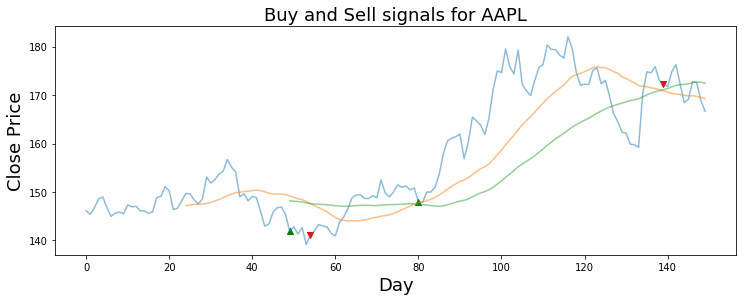

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





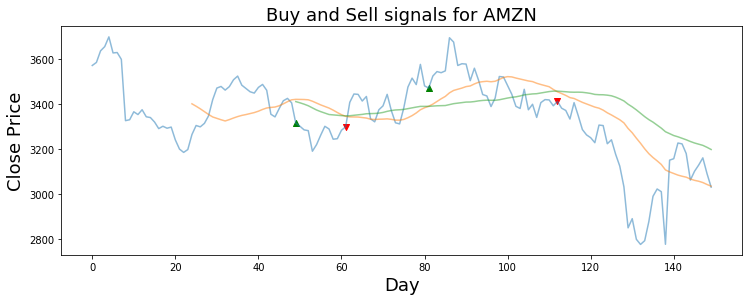

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





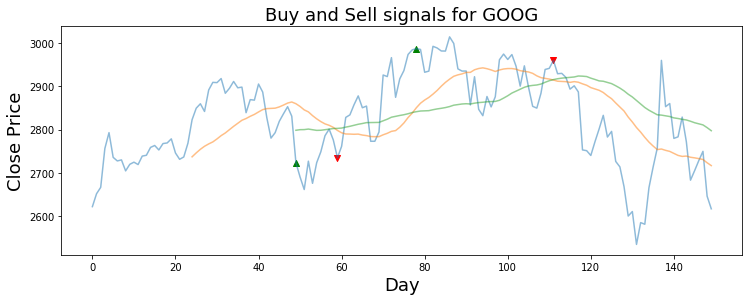

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





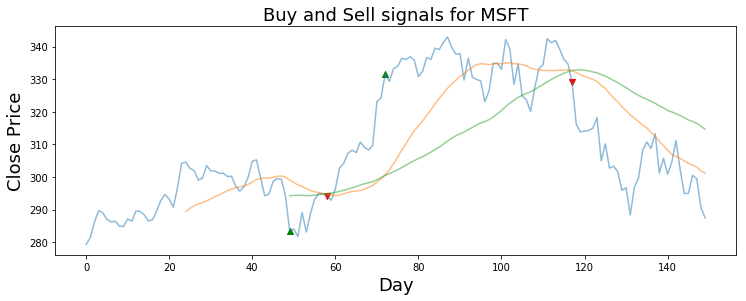

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





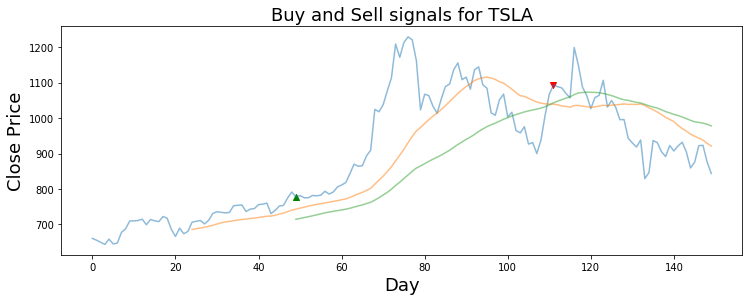

In [ ]:
current_money = 10000
net_lst = []
files = ['df_AAPL_365', 'df_AMZN_365', 'df_GOOG_365', 'df_MSFT_365', 'df_TSLA_365'] 
for i in files:
  filepath = "/content/"+i
  df = pd.read_csv(filepath,sep=',',engine='python',error_bad_lines=False, header = [0])
  df = df[len(df)-150:]
  df = df.reset_index() 
  df = all_SMA(df)

  sell_unique = df.Sell_SMA.unique()
  buy_unique = df.Buy_SMA.unique()
  buy_index = 0
  sell_index = 0
  net = 0
  correction = 0
  df['net'] = df.Sell_SMA.fillna(0) - df.Buy_SMA.fillna(0)
  if len(df.Sell_SMA.unique())< len(df.Buy_SMA.unique()):
    correction+= df.Buy_SMA.unique()[len(df.Sell_SMA.unique()):]
  elif len(df.Sell_SMA.unique())> len(df.Buy_SMA.unique()):
    correction-= df.Sell_SMA.unique()[len(df.Buy_SMA.unique()):]
  current_money = current_money + df['net'].sum() + correction
  net_lst.append(df['net'].sum() + correction)
  plt.figure(figsize=(12.2, 4.2))
  title = 'Buy and Sell signals for '+i[3:7]
  plt.title(title, fontsize = 18)
  plt.plot(df['close'], alpha = 0.5, label = 'Close')
  plt.plot(df['SMA25'], alpha = 0.5, label = 'SMA25')
  plt.plot(df['SMA50'], alpha = 0.5, label = 'SMA50')
  plt.scatter(df.index, df['Buy_SMA'], color = 'green', marker = '^', alpha= 1, label = 'Buy Signal')
  plt.scatter(df.index, df['Sell_SMA'], color = 'red', marker = 'v', alpha= 1, label = 'Sell Signal')
  plt.xlabel('Day', fontsize = 18)
  plt.ylabel('Close Price', fontsize = 18)
  plt.show()

In [ ]:
print('Initial amount in purse : 10000')
for i, f in enumerate(files):
  temp = net_lst[i]
  if type(temp).__module__ == np.__name__:
    temp = temp.flat[0]
  print('Net Gain/Loss for', f[3:7], ':', temp)
print('Current amount in purse after 5 month of backtesting :',current_money)

Initial amount in purse : 10000
Net Gain/Loss for AAPL : 23.580000000000013
Net Gain/Loss for AMZN : -75.32000000000016
Net Gain/Loss for GOOG : -15.684999999999945
Net Gain/Loss for MSFT : 8.090000000000032
Net Gain/Loss for TSLA : 316.26
Current amount in purse after 5 month of backtesting : 10256.925000000001


## EMA

In [ ]:
def all_EMA(df):
  df['EMA25'] = df.close.ewm(span = 25, adjust = False).mean()
  df['EMA50'] = df.close.ewm(span = 50, adjust = False).mean()
  df['Signal'] = np.where(df['EMA25'] > df['EMA50'], 1, 0)
  df['Position'] = df['Signal'].diff()
  df['Buy_EMA'] = np.where(df['Position'] == 1, df['close'], np.nan)
  df['Sell_EMA'] = np.where(df['Position'] == -1, df['close'], np.nan)
  return df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





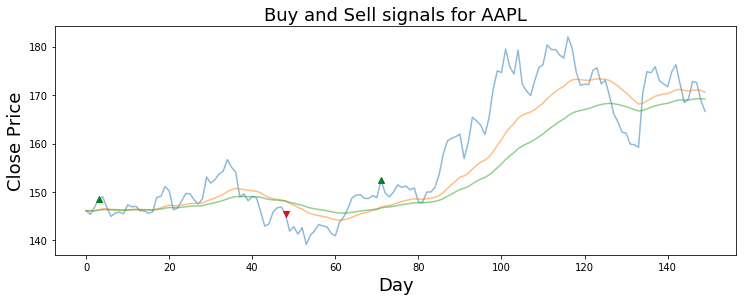

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





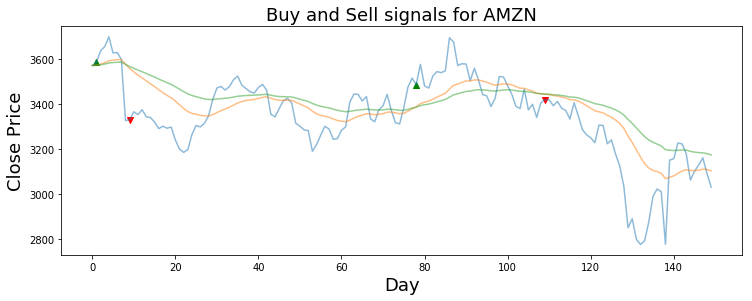

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





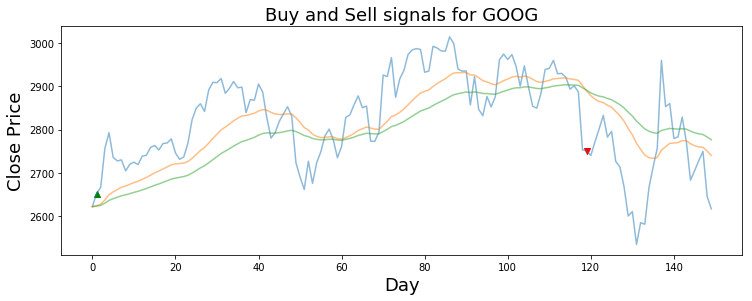

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





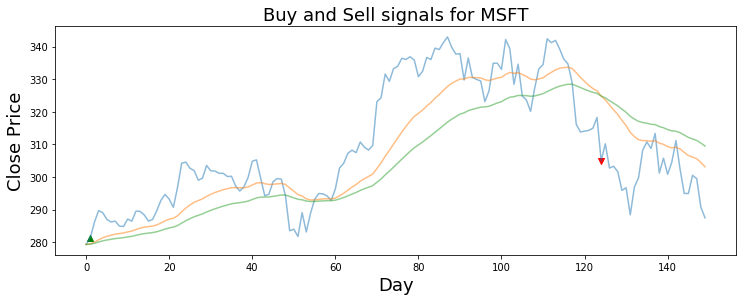

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





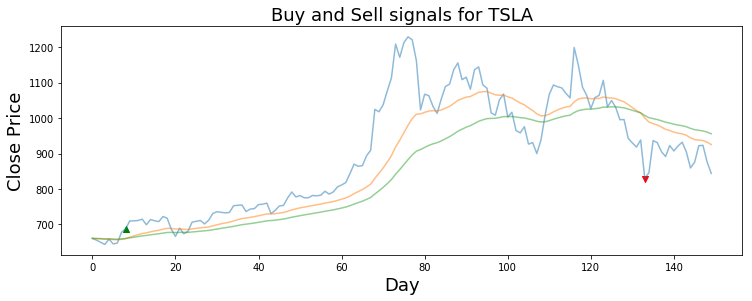

In [ ]:
current_money = 10000
net_lst = []
files = ['df_AAPL_365', 'df_AMZN_365', 'df_GOOG_365', 'df_MSFT_365', 'df_TSLA_365'] 
for i in files:
  filepath = "/content/"+i
  df = pd.read_csv(filepath,sep=',',engine='python',error_bad_lines=False, header = [0])
  df = df[len(df)-150:]
  df = df.reset_index() 
  df = all_EMA(df)

  sell_unique = df.Sell_EMA.unique()
  buy_unique = df.Buy_EMA.unique()
  buy_index = 0
  sell_index = 0
  net = 0
  correction = 0
  df['net'] = df.Sell_EMA.fillna(0) - df.Buy_EMA.fillna(0)
  if len(df.Sell_EMA.unique())< len(df.Buy_EMA.unique()):
    correction+= df.Buy_EMA.unique()[len(df.Sell_EMA.unique()):]
  elif len(df.Sell_EMA.unique())> len(df.Buy_EMA.unique()):
    correction-= df.Sell_EMA.unique()[len(df.Buy_EMA.unique()):]
  current_money = current_money + df['net'].sum() + correction
  net_lst.append(df['net'].sum() + correction)
  plt.figure(figsize=(12.2, 4.2))
  title = 'Buy and Sell signals for '+i[3:7]
  plt.title(title, fontsize = 18)
  plt.plot(df['close'], alpha = 0.5, label = 'Close')
  plt.plot(df['EMA25'], alpha = 0.5, label = 'EMA25')
  plt.plot(df['EMA50'], alpha = 0.5, label = 'EMA50')
  plt.scatter(df.index, df['Buy_EMA'], color = 'green', marker = '^', alpha= 1, label = 'Buy Signal')
  plt.scatter(df.index, df['Sell_EMA'], color = 'red', marker = 'v', alpha= 1, label = 'Sell Signal')
  plt.xlabel('Day', fontsize = 18)
  plt.ylabel('Close Price', fontsize = 18)
  plt.show()

In [ ]:
print('Initial amount in purse : 10000')
for i, f in enumerate(files):
  temp = net_lst[i]
  if type(temp).__module__ == np.__name__:
    temp = temp.flat[0]
  print('Net Gain/Loss for', f[3:7], ':', temp)
print('Current amount in purse after 5 month of backtesting :',current_money)

Initial amount in purse : 10000
Net Gain/Loss for AAPL : -3.1899999999999977
Net Gain/Loss for AMZN : -321.4499999999998
Net Gain/Loss for GOOG : 99.48000000000002
Net Gain/Loss for MSFT : 23.620000000000005
Net Gain/Loss for TSLA : 141.65999999999997
Current amount in purse after 5 month of backtesting : [9940.12]


# Proposed strategy 1 (Three exponential moving averages)

In [ ]:
# Trying on Apple stocks

In [ ]:
local_file="/content/df_AAPL"
df = pd.read_csv(local_file,sep=',',engine='python',error_bad_lines=False, header = [0])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





In [ ]:
ShortEMA = df.close.ewm(span = 5, adjust = False).mean()
MiddleEMA = df.close.ewm(span = 21, adjust = False).mean()
LongEMA = df.close.ewm(span = 63, adjust = False).mean()

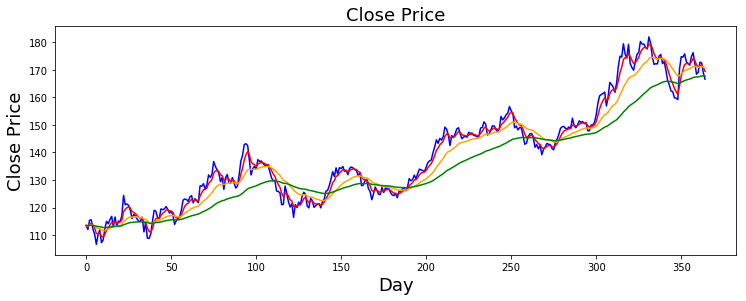

In [ ]:
plt.figure(figsize=(12.2, 4.2))
plt.title('Close Price', fontsize = 18)
plt.plot(df['close'], label = 'Close Price', color= 'blue')
plt.plot(ShortEMA, label = 'Short EMA', color= 'red')
plt.plot(MiddleEMA, label = 'Medium EMA', color= 'orange')
plt.plot(LongEMA, label = 'Long EMA', color= 'green')
plt.xlabel('Day', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.show()

In [ ]:
df['Short'] = ShortEMA
df['Middle'] = MiddleEMA
df['Long'] = LongEMA
df

,time,open,high,low,close,volume,Short,Middle,Long
0,2020-09-10 00:00:00-04:00,119.50,120.0500,112.50,113.4800,141520456,113.480000,113.480000,113.480000
1,2020-09-11 00:00:00-04:00,114.57,115.2300,110.00,112.0100,168935205,112.990000,113.346364,113.434063
2,2020-09-14 00:00:00-04:00,114.72,115.9300,112.80,115.3599,123728990,113.779967,113.529412,113.494245
3,2020-09-15 00:00:00-04:00,118.33,118.8290,113.61,115.5500,171497919,114.369978,113.713102,113.558487
4,2020-09-16 00:00:00-04:00,115.23,116.0000,112.04,112.1300,142859370,113.623319,113.569184,113.513847
...,...,...,...,...,...,...,...,...,...
360,2022-02-14 00:00:00-05:00,167.37,169.5800,166.56,169.1300,64590666,170.913675,170.920972,167.472155
361,2022-02-15 00:00:00-05:00,170.99,172.9500,170.25,172.8000,51878759,171.542450,171.091793,167.638651
362,2022-02-16 00:00:00-05:00,171.82,173.3400,170.05,172.5500,50239943,171.878300,171.224357,167.792130
363,2022-02-17 00:00:00-05:00,171.15,171.9100,168.47,168.9200,55763565,170.892200,171.014870,167.827376


In [ ]:
def buy_sell(data):
  buy_list = []
  sell_list = []
  flag_long = False
  flag_short = False
  for i in range(len(data)):
    if data['Middle'][i]< data['Long'][i] and data['Short'][i]< data['Middle'][i] and flag_long == False and flag_short == False:
      buy_list.append(data['close'][i])
      sell_list.append(np.nan)
      flag_short = True
      temp = 1
    elif flag_short == True and data['Short'][i]>data['Middle'][i]:
      sell_list.append(data['close'][i])
      buy_list.append(np.nan)
      flag_short = False
    elif data['Middle'][i]> data['Long'][i] and data['Short'][i]> data['Middle'][i] and flag_long == False and flag_short == False:
      buy_list.append(data['close'][i])
      sell_list.append(np.nan)
      flag_long = True
    elif flag_long == True and data['Short'][i]<data['Middle'][i]:
      sell_list.append(data['close'][i])
      buy_list.append(np.nan)
      flag_long = False
    else:
      buy_list.append(np.nan)
      sell_list.append(np.nan)
  return (buy_list, sell_list)

In [ ]:
df['Buy'] = buy_sell(df)[0]
df['Sell'] = buy_sell(df)[1]

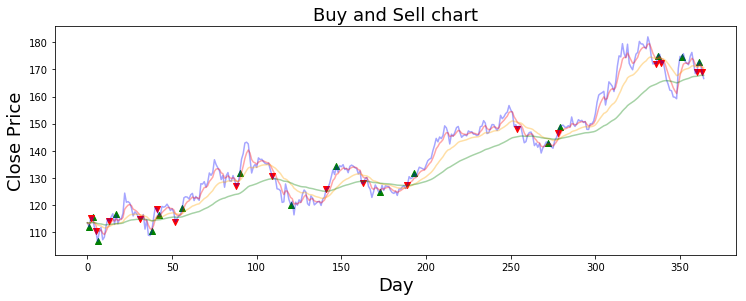

In [ ]:
plt.figure(figsize=(12.2, 4.2))
plt.title('Buy and Sell chart', fontsize = 18)
plt.plot(df['close'], label = 'Close Price', color= 'blue', alpha = 0.35)
plt.plot(ShortEMA, label = 'Short EMA', color= 'red', alpha = 0.35)
plt.plot(MiddleEMA, label = 'Medium EMA', color= 'orange', alpha = 0.35)
plt.plot(LongEMA, label = 'Long EMA', color= 'green', alpha = 0.35)
plt.scatter(df.index, df['Buy'], color = 'green', marker = '^', alpha= 1)
plt.scatter(df.index, df['Sell'], color = 'red', marker = 'v', alpha= 1)
plt.xlabel('Day', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.show()

# Proposed strategy 1 on all the stocks together (including backtesting and calculating net profit/loss)

In [ ]:
# Trying on all the stocks and calculating the net profit/loss

In [ ]:
def all_EMA(df):
  ShortEMA = df.close.ewm(span = 7, adjust = False).mean()
  MiddleEMA = df.close.ewm(span = 21, adjust = False).mean()
  LongEMA = df.close.ewm(span = 63, adjust = False).mean()
  df['Short'] = ShortEMA
  df['Middle'] = MiddleEMA
  df['Long'] = LongEMA
  df['Buy'] = buy_sell(df)[0]
  df['Sell'] = buy_sell(df)[1]
  return df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





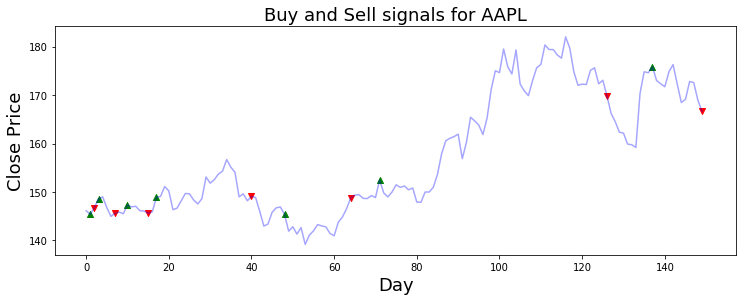

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





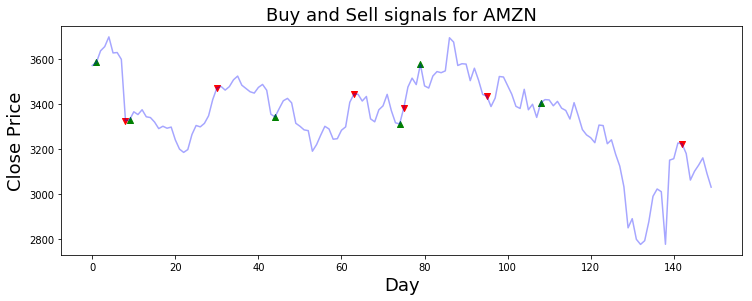

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





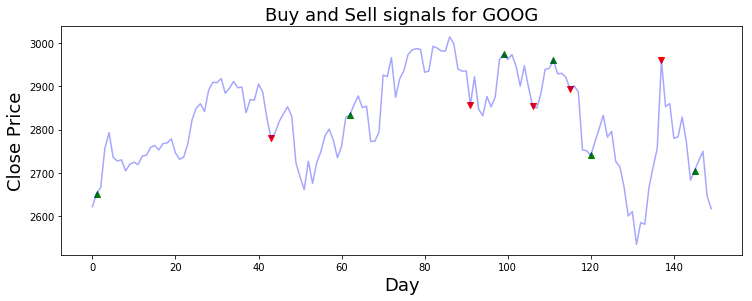

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





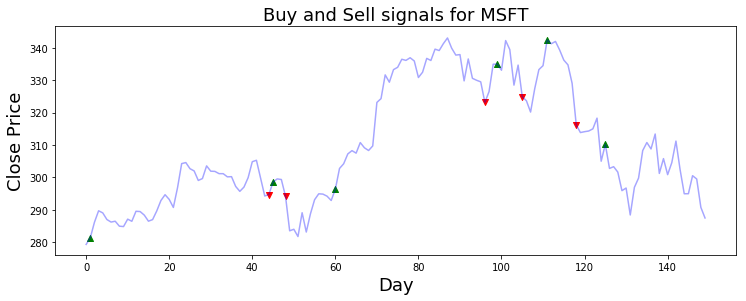

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





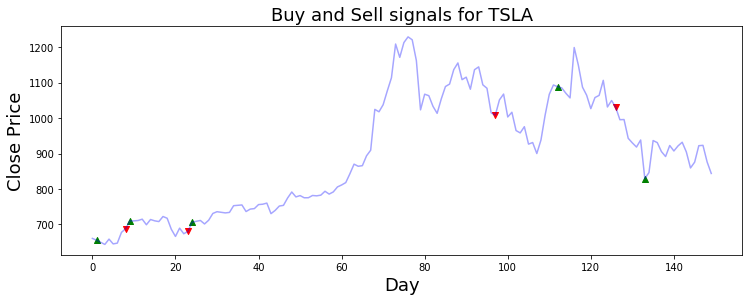

In [ ]:
current_money = 10000
net_lst = []
buy_lst = []
files = ['df_AAPL_365', 'df_AMZN_365', 'df_GOOG_365', 'df_MSFT_365', 'df_TSLA_365'] 
for i in files:
  filepath = "/content/"+i
  df = pd.read_csv(filepath,sep=',',engine='python',error_bad_lines=False, header = [0])
  # print(df.head())
  df = df[len(df)-150:]
  df = df.reset_index()
  df = all_EMA(df)
  # print(df.head())
  # print(df['Buy_SMA'].nunique())
  # print(df.Buy.unique())
  # print(df.Sell.unique())

  sell_unique = df.Sell.unique()
  buy_unique = df.Buy.unique()
  # print(buy_unique)
  # print(sell_unique)
  buy_index = 0
  sell_index = 0
  net = 0
  correction = 0

  # for i in range(2*min(len(buy_unique), len(sell_unique))):
  #   if buy_unique[buy_index]!= np.nan:
  #     net = net - buy_unique[buy_index]
  #     buy_index = buy_index + 1
  #   elif sell_unique[sell_index]!= np.nan:
  #     net = net + sell_unique[sell_index]
  #     sell_index = sell_index + 1
  # if buy_index!=len(buy_unique):
  #   net = net - buy_unique[buy_index:]
  # elif sell_index!=len(sell_unique):
  #   net = net + sell_unique[sell_index:]

  df['net'] = df.Sell.fillna(0) - df.Buy.fillna(0)
  # net_lst.append(df['net'].sum())
  # net_lst.append(net)
  if len(df.Sell.unique())< len(df.Buy.unique()):
    correction+= df.Buy.unique()[len(df.Sell.unique()):]
  elif len(df.Sell.unique())> len(df.Buy.unique()):
    correction-= df.Sell.unique()[len(df.Buy.unique()):]
  # buy_lst.append(df.Buy.unique()[-1])
  current_money = current_money + df['net'].sum() + correction #+ df.Buy.unique()[-1]
  net_lst.append(df['net'].sum() + correction)
  # print(df['net'].sum() + correction)
  # print(df.Buy.unique()[-1])
  # print(df.sum(axis=1,skipna=True))
  # + df.sum(axis=1, skipna=True)[-1]
  plt.figure(figsize=(12.2, 4.2))
  title = 'Buy and Sell signals for '+i[3:7]
  plt.title(title, fontsize = 18)
  plt.plot(df['close'], label = 'Close Price', color= 'blue', alpha = 0.35)
  # plt.plot(ShortEMA, label = 'Short EMA', color= 'red', alpha = 0.35)
  # plt.plot(MiddleEMA, label = 'Medium EMA', color= 'orange', alpha = 0.35)
  # plt.plot(LongEMA, label = 'Long EMA', color= 'green', alpha = 0.35)
  plt.scatter(df.index, df['Buy'], color = 'green', marker = '^', alpha= 1)
  plt.scatter(df.index, df['Sell'], color = 'red', marker = 'v', alpha= 1)
  plt.xlabel('Day', fontsize = 18)
  plt.ylabel('Close Price', fontsize = 18)
  plt.show()

In [ ]:
print('Initial amount in purse : 10000')
for i, f in enumerate(files):
  temp = net_lst[i]
  # print(type(temp))
  if type(temp).__module__ == np.__name__:
    temp = temp.flat[0]
  print('Net Gain/Loss for', f[3:7], ':', temp)#+ buy_lst[i])
print('Current amount in purse after 5 month of backtesting :',current_money)

Initial amount in purse : 10000
Net Gain/Loss for AAPL : 8.516500000000093
Net Gain/Loss for AMZN : -269.1700000000001
Net Gain/Loss for GOOG : 183.9699999999998
Net Gain/Loss for MSFT : -0.5999999999999659
Net Gain/Loss for TSLA : 246.6600000000003
Current amount in purse after 5 month of backtesting : [10169.3765]


# Proposed strategy 2 on all the stocks together (including backtesting and calculating net profit/loss)

In [ ]:
# proposed startegy 2 involving three moving averages and Stochastic Relative Strength indicator

In [ ]:
def buy_sell_new(data):
  buy_list = []
  sell_list = []
  flag_long = False
  flag_short = False

  for i in range(len(data)):
    if data['Middle'][i]< data['Long'][i] and data['Short'][i]< data['Middle'][i] and flag_long == False and flag_short == False and data['StockRSI'][i]>0.75:
      buy_list.append(data['close'][i])
      sell_list.append(np.nan)
      flag_short = True
    elif flag_short == True and data['Short'][i]>data['Middle'][i] and data['StockRSI'][i]<0.25:
      sell_list.append(data['close'][i])
      buy_list.append(np.nan)
      flag_short = False
    elif data['Middle'][i]> data['Long'][i] and data['Short'][i]> data['Middle'][i] and flag_long == False and flag_short == False and data['StockRSI'][i]>0.75:
      buy_list.append(data['close'][i])
      sell_list.append(np.nan)
      flag_long = True
    elif flag_long == True and data['Short'][i]<data['Middle'][i] and data['StockRSI'][i]<0.25:
      sell_list.append(data['close'][i])
      buy_list.append(np.nan)
      flag_long = False
    else:
      buy_list.append(np.nan)
      sell_list.append(np.nan)
  return (buy_list, sell_list)

In [ ]:
def all_strategy(df):
  ShortEMA = df.close.ewm(span = 7, adjust = False).mean()
  MiddleEMA = df.close.ewm(span = 21, adjust = False).mean()
  LongEMA = df.close.ewm(span = 63, adjust = False).mean()
  df['Short'] = ShortEMA
  df['Middle'] = MiddleEMA
  df['Long'] = LongEMA
  df['StockRSI'] = stochRSI(df)
  df['Buy'] = buy_sell_new(df)[0]
  df['Sell'] = buy_sell_new(df)[1]
  return df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





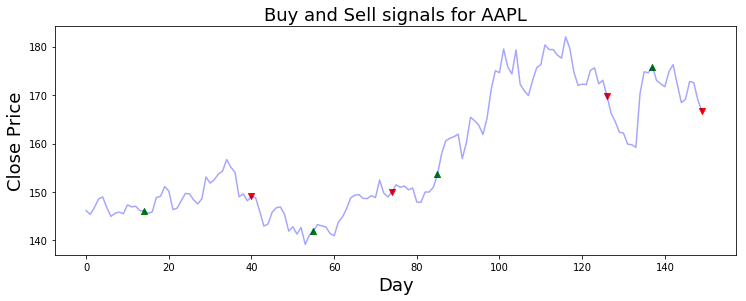

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





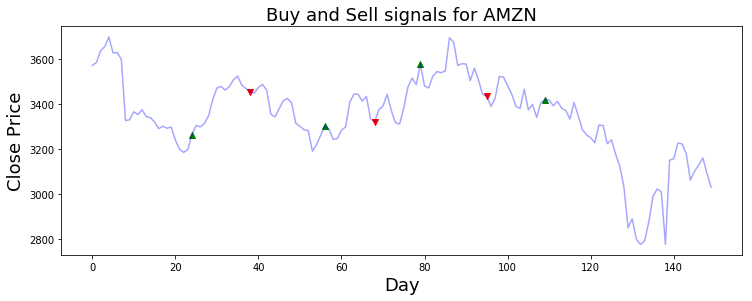

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





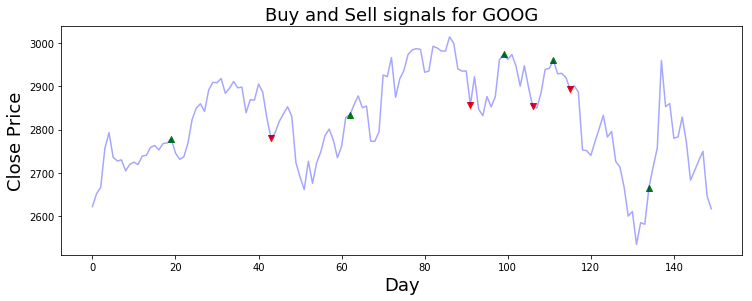

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





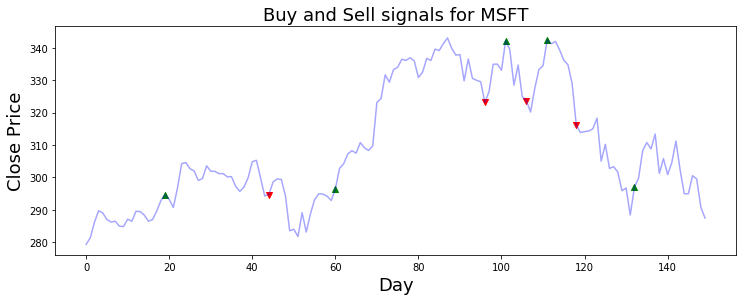

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





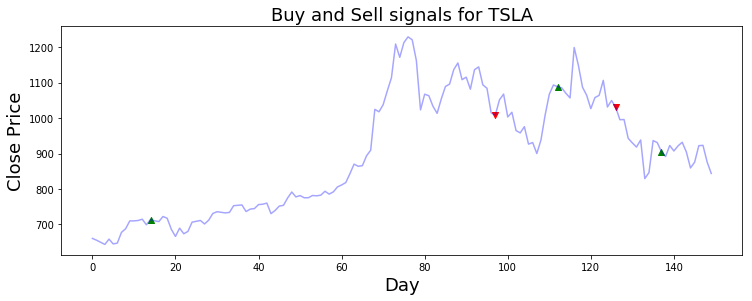

In [ ]:
current_money = 10000
net_lst = []
buy_lst = []
files = ['df_AAPL_365', 'df_AMZN_365', 'df_GOOG_365', 'df_MSFT_365', 'df_TSLA_365'] 
for i in files:
  filepath = "/content/"+i
  df = pd.read_csv(filepath,sep=',',engine='python',error_bad_lines=False, header = [0])
  df = df[len(df)-150:]
  df = df.reset_index()
  df = all_strategy(df)
  sell_unique = df.Sell.unique()
  buy_unique = df.Buy.unique()
  buy_index = 0
  sell_index = 0
  net = 0
  correction = 0
  df['net'] = df.Sell.fillna(0) - df.Buy.fillna(0)
  if len(df.Sell.unique())< len(df.Buy.unique()):
    correction+= df.Buy.unique()[len(df.Sell.unique()):]
  elif len(df.Sell.unique())> len(df.Buy.unique()):
    correction-= df.Sell.unique()[len(df.Buy.unique()):]
  current_money = current_money + df['net'].sum() + correction
  net_lst.append(df['net'].sum() + correction)
  plt.figure(figsize=(12.2, 4.2))
  title = 'Buy and Sell signals for '+i[3:7]
  plt.title(title, fontsize = 18)
  plt.plot(df['close'], label = 'Close Price', color= 'blue', alpha = 0.35)
  plt.scatter(df.index, df['Buy'], color = 'green', marker = '^', alpha= 1)
  plt.scatter(df.index, df['Sell'], color = 'red', marker = 'v', alpha= 1)
  plt.xlabel('Day', fontsize = 18)
  plt.ylabel('Close Price', fontsize = 18)
  plt.show()

In [ ]:
print('Initial amount in purse : 10000')
for i, f in enumerate(files):
  temp = net_lst[i]
  # print(type(temp))
  if type(temp).__module__ == np.__name__:
    temp = temp.flat[0]
  print('Net Gain/Loss for', f[3:7], ':', temp)#+ buy_lst[i])
print('Current amount in purse after 5 month of backtesting :',current_money)

Initial amount in purse : 10000
Net Gain/Loss for AAPL : 18.018299999999954
Net Gain/Loss for AMZN : 69.67000000000098
Net Gain/Loss for GOOG : -162.6500000000001
Net Gain/Loss for MSFT : -17.990000000000123
Net Gain/Loss for TSLA : 236.31000000000006
Current amount in purse after 5 month of backtesting : [10143.3583]


# LSTM

In [ ]:
# References - https://github.com/alexavierc/LSTM-Stock-Prices

In [ ]:
local_file="/content/df_AAPL"
df = pd.read_csv(local_file,sep=',',engine='python',error_bad_lines=False, header = [0])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





In [ ]:
look_back = 30
forward_days = 5
num_periods = 20

In [ ]:
df = df[['time','close']] 
df['time'] = pd.to_datetime(df['time'].apply(lambda x: x.split()[0])) 
df.set_index('time',drop=True,inplace=True) 
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,close
time,
2020-09-10,113.4800
2020-09-11,112.0100
2020-09-14,115.3599
2020-09-15,115.5500
2020-09-16,112.1300


In [ ]:
array = df.values.reshape(df.shape[0],1)
array[:5]

array([[113.48  ],
       [112.01  ],
       [115.3599],
       [115.55  ],
       [112.13  ]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()
array = scl.fit_transform(array)
array[:5]

array([[0.09124668],
       [0.07175066],
       [0.11617905],
       [0.11870027],
       [0.07334218]])

In [ ]:
division = len(array) - num_periods*forward_days

array_test = array[division-look_back:]
array_train = array[:division]

In [ ]:
def processData(data, look_back, forward_days,jump=1):
    X,Y = [],[]
    for i in range(0,len(data) -look_back -forward_days +1, jump):
        X.append(data[i:(i+look_back)])
        Y.append(data[(i+look_back):(i+look_back+forward_days)])
    return np.array(X),np.array(Y)

In [ ]:
X_test,y_test = processData(array_test,look_back,forward_days,forward_days)
y_test = np.array([list(a.ravel()) for a in y_test])
X,y = processData(array_train,look_back,forward_days)
y = np.array([list(a.ravel()) for a in y])
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
print(X_train.shape)
print(X_validate.shape)
print(X_test.shape)
print(y_train.shape)
print(y_validate.shape)
print(y_test.shape)

(184, 30, 1)
(47, 30, 1)
(20, 30, 1)
(184, 5)
(47, 5)
(20, 5)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

NUM_NEURONS_FirstLayer = 50
NUM_NEURONS_SecondLayer = 30
EPOCHS = 50
model = Sequential()
model.add(LSTM(NUM_NEURONS_FirstLayer,input_shape=(look_back,1), return_sequences=True))
model.add(LSTM(NUM_NEURONS_SecondLayer,input_shape=(NUM_NEURONS_FirstLayer,1)))
model.add(Dense(forward_days))
model.compile(loss='mean_squared_error', optimizer='adam')

# model = Sequential()
# model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))
# model.add(Dropout(0.1)) 
# model.add(LSTM(units=50))
# model.add(Dense(2))
# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

history = model.fit(X_train,y_train,epochs=EPOCHS,validation_data=(X_validate,y_validate),shuffle=True,batch_size=2, verbose=2)

Epoch 1/50
92/92 - 7s - loss: 0.0142 - val_loss: 0.0067 - 7s/epoch - 75ms/step
Epoch 2/50
92/92 - 1s - loss: 0.0056 - val_loss: 0.0060 - 537ms/epoch - 6ms/step
Epoch 3/50
92/92 - 1s - loss: 0.0056 - val_loss: 0.0050 - 538ms/epoch - 6ms/step
Epoch 4/50
92/92 - 0s - loss: 0.0047 - val_loss: 0.0037 - 437ms/epoch - 5ms/step
Epoch 5/50
92/92 - 0s - loss: 0.0046 - val_loss: 0.0033 - 443ms/epoch - 5ms/step
Epoch 6/50
92/92 - 0s - loss: 0.0040 - val_loss: 0.0052 - 465ms/epoch - 5ms/step
Epoch 7/50
92/92 - 0s - loss: 0.0042 - val_loss: 0.0031 - 454ms/epoch - 5ms/step
Epoch 8/50
92/92 - 0s - loss: 0.0037 - val_loss: 0.0034 - 458ms/epoch - 5ms/step
Epoch 9/50
92/92 - 1s - loss: 0.0036 - val_loss: 0.0033 - 530ms/epoch - 6ms/step
Epoch 10/50
92/92 - 1s - loss: 0.0037 - val_loss: 0.0029 - 519ms/epoch - 6ms/step
Epoch 11/50
92/92 - 0s - loss: 0.0036 - val_loss: 0.0049 - 434ms/epoch - 5ms/step
Epoch 12/50
92/92 - 0s - loss: 0.0033 - val_loss: 0.0027 - 432ms/epoch - 5ms/step
Epoch 13/50
92/92 - 0s - lo

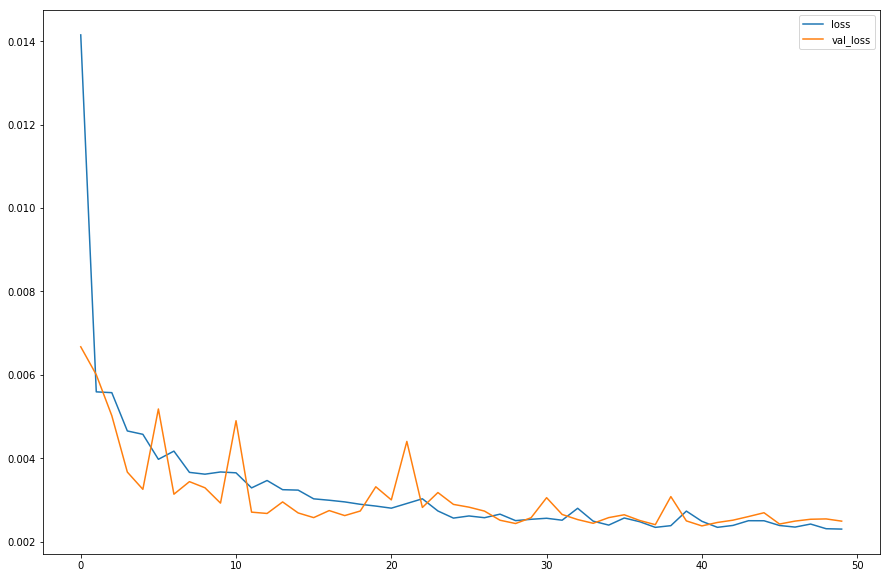

In [ ]:
plt.figure(figsize = (15,10))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='best')
plt.show()

In [ ]:
Xt = model.predict(X_test)

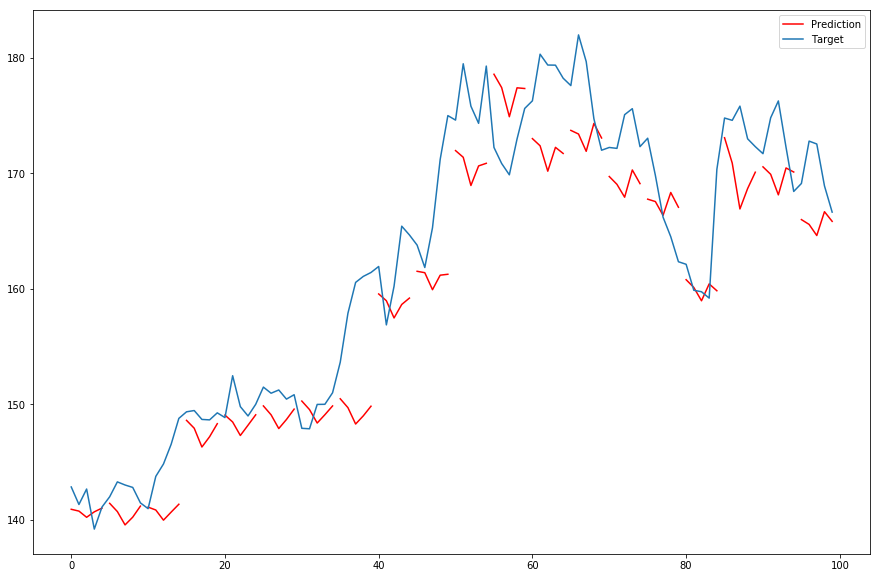

In [ ]:
plt.figure(figsize = (15,10))
for i in range(0,len(Xt)):
    plt.plot([x + i*forward_days for x in range(len(Xt[i]))], scl.inverse_transform(Xt[i].reshape(-1,1)), color='r')
plt.plot(0, scl.inverse_transform(Xt[i].reshape(-1,1))[0], color='r', label='Prediction') #only to place the label
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)), label='Target')
plt.legend(loc='best')
plt.show()

In [ ]:
division = len(array) - num_periods*forward_days

leftover = division%forward_days+1

array_test = array[division-look_back:]
array_train = array[leftover:division]

In [ ]:
Xtrain,ytrain = processData(array_train,look_back,forward_days,forward_days)
Xtest,ytest = processData(array_test,look_back,forward_days,forward_days)

In [ ]:
Xtrain = model.predict(Xtrain)
Xtrain = Xtrain.ravel()
Xtest = model.predict(Xtest)
Xtest = Xtest.ravel()

In [ ]:
y = np.concatenate((ytrain, ytest), axis=0)

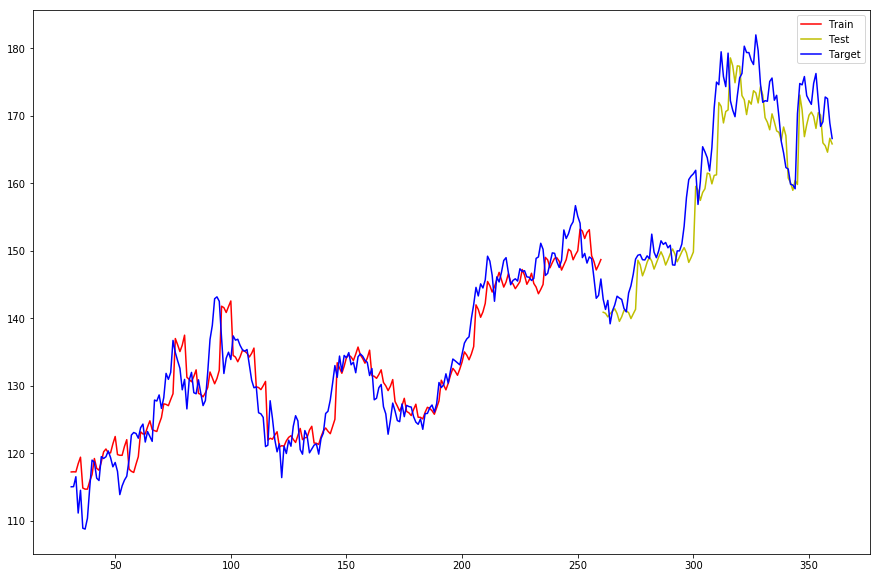

In [ ]:
plt.figure(figsize = (15,10))
plt.plot([x for x in range(look_back+leftover, len(Xtrain)+look_back+leftover)], scl.inverse_transform(Xtrain.reshape(-1,1)), color='r', label='Train')
plt.plot([x for x in range(look_back +leftover+ len(Xtrain), len(Xtrain)+len(Xtest)+look_back+leftover)], scl.inverse_transform(Xtest.reshape(-1,1)), color='y', label='Test')
plt.plot([x for x in range(look_back+leftover, look_back+leftover+len(Xtrain)+len(Xtest))], scl.inverse_transform(y.reshape(-1,1)), color='b', label='Target')
plt.legend(loc='best')
plt.show()

# LSTM- All companies

In [ ]:
# References - https://github.com/alexavierc/LSTM-Stock-Prices

In [ ]:
num_companies = 5
look_back = 30
forward_days = 5
num_periods = 20

companies_names = ['AAPL', 'AMZN', 'GOOG', 'MSFT', 'TSLA']
colors = ['r','g','c','m','y','k','w','b'] #from matplotlib

In [ ]:
df_A = pd.read_csv('/content/df_AAPL')
df_A['time'] = pd.to_datetime(df_A['time'])

df_B = pd.read_csv('/content/df_AMZN')
df_B['time'] = pd.to_datetime(df_B['time'])

df_C = pd.read_csv('/content/df_GOOG')
df_C['time'] = pd.to_datetime(df_C['time'])

df_D = pd.read_csv('/content/df_MSFT')
df_D['time'] = pd.to_datetime(df_D['time'])

df_E = pd.read_csv('/content/df_TSLA')
df_E['time'] = pd.to_datetime(df_E['time'])

In [ ]:
companies = [df_A, df_B, df_C, df_D, df_E]

for comapany in companies:
    comapany.set_index('time', inplace=True)
    comapany.drop(['open', 'high', 'low', 'volume'], axis=1, inplace=True)

In [ ]:
df_A

,close
time,
2020-09-10 00:00:00-04:00,113.4800
2020-09-11 00:00:00-04:00,112.0100
2020-09-14 00:00:00-04:00,115.3599
2020-09-15 00:00:00-04:00,115.5500
2020-09-16 00:00:00-04:00,112.1300
...,...
2022-02-14 00:00:00-05:00,169.1300
2022-02-15 00:00:00-05:00,172.8000
2022-02-16 00:00:00-05:00,172.5500


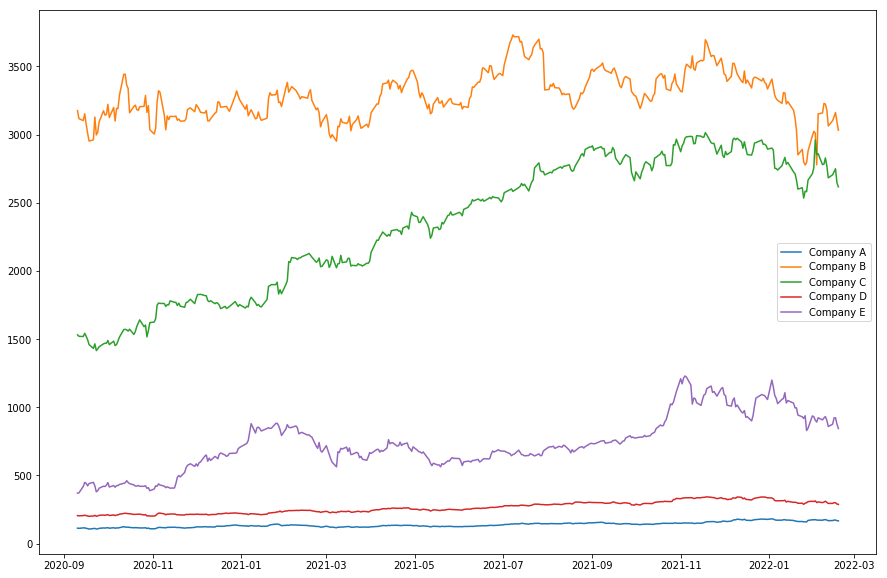

In [ ]:
plt.figure(figsize = (15,10))

plt.plot(df_A, label='Company A')
plt.plot(df_B, label='Company B')
plt.plot(df_C, label='Company C')
plt.plot(df_D, label='Company D')
plt.plot(df_E, label='Company E')


plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scl = MinMaxScaler()
args = [company.values.reshape(company.shape[0],1) for company in companies]

In [ ]:
array = scl.fit_transform(np.concatenate((args[0],args[1],args[2],args[3],args[4]), axis=1))

In [ ]:
division = len(array) - num_periods*forward_days

array_test = array[division-look_back:]
array_train = array[:division]

In [ ]:
def processData(data, look_back, forward_days,num_companies,jump=1):
    X,Y = [],[]
    for i in range(0,len(data) -look_back -forward_days +1, jump):
        X.append(data[i:(i+look_back)])
        Y.append(data[(i+look_back):(i+look_back+forward_days)])
    return np.array(X),np.array(Y)

In [ ]:
X_test,y_test = processData(array_test,look_back,forward_days,num_companies,forward_days)
y_test = np.array([list(a.ravel()) for a in y_test])

X,y = processData(array_train,look_back,forward_days,num_companies)
y = np.array([list(x.ravel()) for x in y])

from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
print(X_train.shape)
print(X_validate.shape)
print(X_test.shape)
print(y_train.shape)
print(y_validate.shape)
print(y_test.shape)

(184, 30, 5)
(47, 30, 5)
(20, 30, 5)
(184, 25)
(47, 25)
(20, 25)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

NUM_NEURONS_FirstLayer = 200
NUM_NEURONS_SecondLayer = 100
EPOCHS = 50

model = Sequential()

model.add(LSTM(NUM_NEURONS_FirstLayer,input_shape=(look_back,num_companies), return_sequences=True))
model.add(LSTM(NUM_NEURONS_SecondLayer,input_shape=(NUM_NEURONS_FirstLayer,1)))
model.add(Dense(forward_days * num_companies))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train,y_train,epochs=EPOCHS,validation_data=(X_validate,y_validate),shuffle=True,batch_size=1, verbose=2)

Epoch 1/50
184/184 - 4s - loss: 0.0158 - val_loss: 0.0069 - 4s/epoch - 22ms/step
Epoch 2/50
184/184 - 1s - loss: 0.0065 - val_loss: 0.0052 - 923ms/epoch - 5ms/step
Epoch 3/50
184/184 - 1s - loss: 0.0064 - val_loss: 0.0063 - 883ms/epoch - 5ms/step
Epoch 4/50
184/184 - 1s - loss: 0.0048 - val_loss: 0.0044 - 904ms/epoch - 5ms/step
Epoch 5/50
184/184 - 1s - loss: 0.0054 - val_loss: 0.0048 - 908ms/epoch - 5ms/step
Epoch 6/50
184/184 - 1s - loss: 0.0045 - val_loss: 0.0037 - 883ms/epoch - 5ms/step
Epoch 7/50
184/184 - 1s - loss: 0.0046 - val_loss: 0.0046 - 879ms/epoch - 5ms/step
Epoch 8/50
184/184 - 1s - loss: 0.0041 - val_loss: 0.0039 - 914ms/epoch - 5ms/step
Epoch 9/50
184/184 - 1s - loss: 0.0040 - val_loss: 0.0035 - 887ms/epoch - 5ms/step
Epoch 10/50
184/184 - 1s - loss: 0.0033 - val_loss: 0.0029 - 880ms/epoch - 5ms/step
Epoch 11/50
184/184 - 1s - loss: 0.0034 - val_loss: 0.0036 - 912ms/epoch - 5ms/step
Epoch 12/50
184/184 - 1s - loss: 0.0034 - val_loss: 0.0038 - 862ms/epoch - 5ms/step
Epo

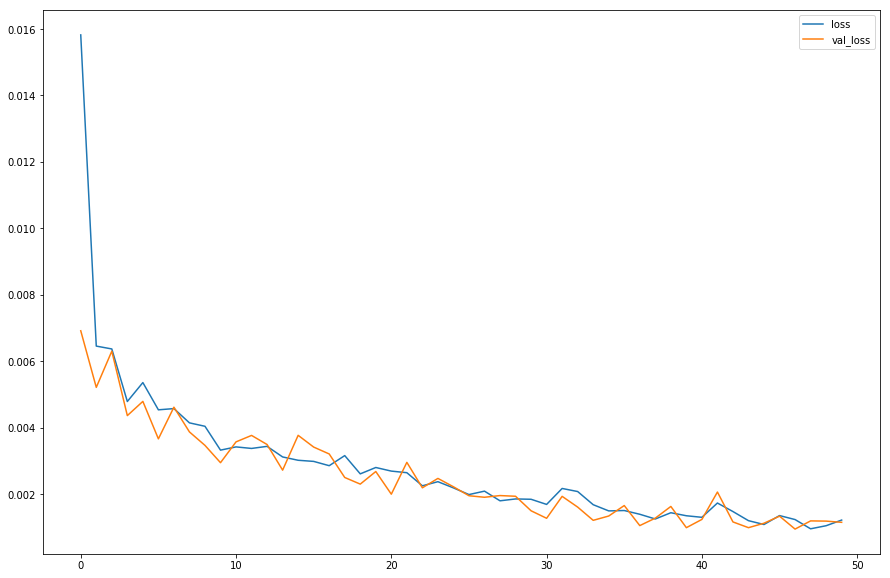

In [ ]:
plt.figure(figsize = (15,10))

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='best')
plt.show()

In [ ]:
X_test,y_test = processData(array_test,look_back,forward_days,num_companies,forward_days)
y_test = np.array([list(a.ravel()) for a in y_test])

Xt = model.predict(X_test)
Xt.shape

(20, 25)

In [ ]:
def do_inverse_transform(output_result,num_companies = 5):
    
    original_matrix_format = []
    for result in output_result:
        original_matrix_format.append(scl.inverse_transform([result[x:x+num_companies] for x in range(0, len(result), num_companies)]))
    original_matrix_format = np.array(original_matrix_format)
    
    for i in range(len(original_matrix_format)):
        output_result[i] = original_matrix_format[i].ravel()

    return output_result

In [ ]:
def prediction_by_step_by_company(raw_model_output, num_companies):
    matrix_prediction = []
    for i in range(0,num_companies):
        matrix_prediction.append([[lista[j] for j in range(i,len(lista),num_companies)] for lista in raw_model_output])
    return np.array(matrix_prediction)

In [ ]:
Xt = do_inverse_transform(Xt)

MP = prediction_by_step_by_company(Xt, num_companies)
MP.shape

(5, 20, 5)

In [ ]:
def target_by_company(raw_model_output, num_companies):
    matrix_target = [[] for x in range(num_companies)]
    
    for output in raw_model_output:
        for i in range (num_companies):
            for j in range(0,len(output),num_companies):
                matrix_target[i].append(output[i+j])
    return np.array(matrix_target)

In [ ]:
Yt = do_inverse_transform(y_test)

MT = target_by_company(Yt, num_companies)
MT.shape

(5, 100)

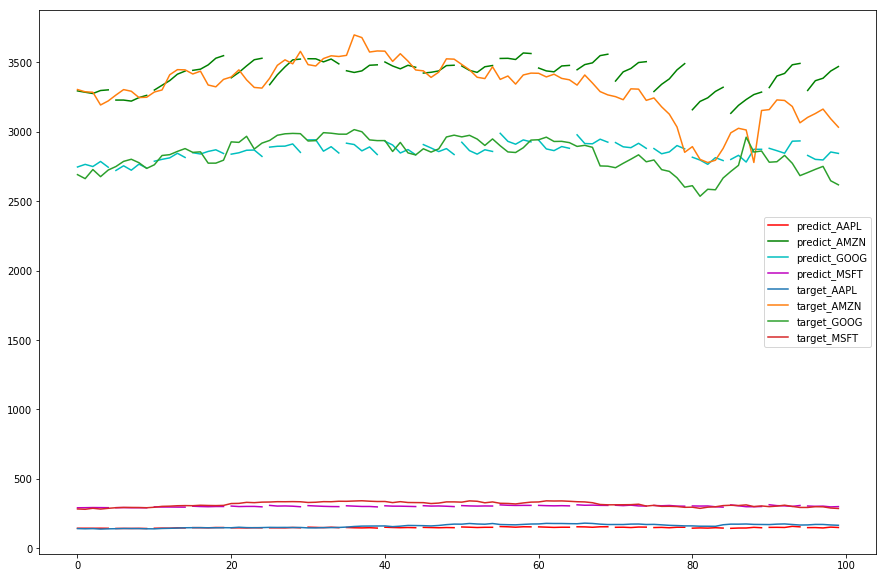

In [ ]:
plt.figure(figsize = (15,10))
companies_to_show = [0,1,2,3]
for id_company in companies_to_show:
    for i in range(0,len(MP[id_company])):
        plt.plot([x + i*forward_days for x in range(len(MP[id_company][i]))], MP[id_company][i], color=colors[id_company])
    plt.plot(0,MP[id_company][0][0] ,color=colors[id_company], label='predict_{}'.format(companies_names[id_company]))
for id_company in companies_to_show:
    plt.plot(MT[id_company], label='target_{}'.format(companies_names[id_company]))
plt.legend(loc='best')
plt.show()

In [ ]:
X_all,y_all = processData(array,look_back,forward_days,num_companies,forward_days)
y_all = np.array([list(a.ravel()) for a in y_all])

In [ ]:
Xt = model.predict(X_all)
Xt.shape

(67, 25)

In [ ]:
Xt = do_inverse_transform(Xt)
MP = prediction_by_step_by_company(Xt, num_companies)
MP.shape

(5, 67, 5)

In [ ]:
Yt = do_inverse_transform(y_all)
MT = target_by_company(Yt, num_companies)
MT.shape

(5, 335)

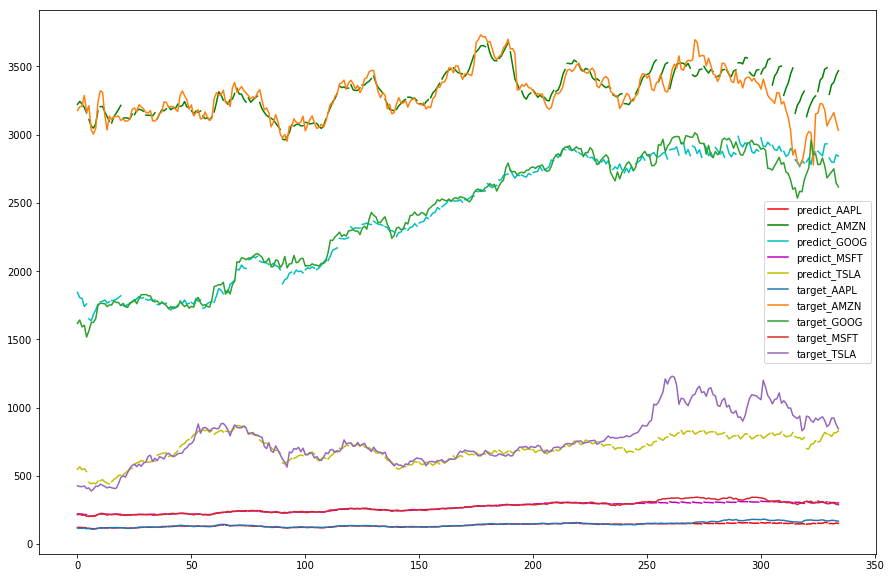

In [ ]:
plt.figure(figsize = (15,10))
companies_to_show = [0,1,2,3, 4]
  
for id_company in companies_to_show:
    for i in range(0,len(MP[id_company])):
        plt.plot([x + i*forward_days for x in range(len(MP[id_company][i]))], MP[id_company][i], color=colors[id_company])
    plt.plot(0,MP[id_company][0][0] ,color=colors[id_company], label='predict_{}'.format(companies_names[id_company]))
for id_company in companies_to_show:
    plt.plot(MT[id_company], label='target_{}'.format(companies_names[id_company]))

plt.legend(loc='best')
plt.show()

#Combine EMA and LSTM

In [ ]:
def all_EMA(df, MP, k):
  ShortEMA = df.close.ewm(span = 7, adjust = False).mean()
  MiddleEMA = df.close.ewm(span = 21, adjust = False).mean()
  LongEMA = df.close.ewm(span = 63, adjust = False).mean()
  df['Short'] = ShortEMA
  df['Middle'] = MiddleEMA
  df['Long'] = LongEMA
  df['Buy'] = buy_sell(df, MP, k)[0]
  df['Sell'] = buy_sell(df, MP, k)[1]
  return df

In [ ]:
def buy_sell(data, MP, k):
  buy_list = []
  sell_list = []
  flag_long = False
  flag_short = False
  h = 0
  for i in range(len(data)):
    if data['Middle'][i]< data['Long'][i] and data['Short'][i]< data['Middle'][i] and flag_long == False and flag_short == False and MP[k][h][4]>MP[k][h][0]:
      buy_list.append(data['close'][i])
      sell_list.append(np.nan)
      flag_short = True
      temp = 1
    elif flag_short == True and data['Short'][i]>data['Middle'][i] and MP[k][h][4]<MP[k][h][0]:
      sell_list.append(data['close'][i])
      buy_list.append(np.nan)
      flag_short = False
    elif data['Middle'][i]> data['Long'][i] and data['Short'][i]> data['Middle'][i] and flag_long == False and flag_short == False and MP[k][h][4]>MP[k][h][0]:
      buy_list.append(data['close'][i])
      sell_list.append(np.nan)
      flag_long = True
    elif flag_long == True and data['Short'][i]<data['Middle'][i] and MP[k][h][4]<MP[k][h][0]:
      sell_list.append(data['close'][i])
      buy_list.append(np.nan)
      flag_long = False
    else:
      buy_list.append(np.nan)
      sell_list.append(np.nan)
    h = h+1
  return (buy_list, sell_list)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





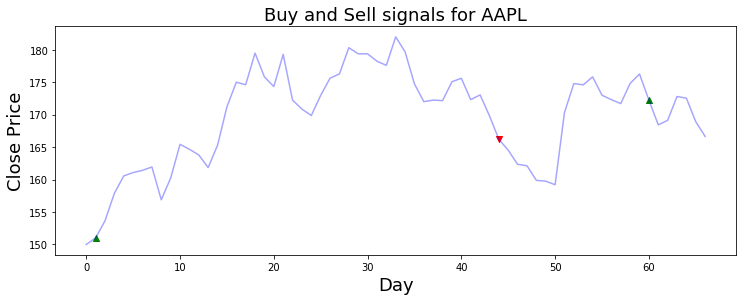

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





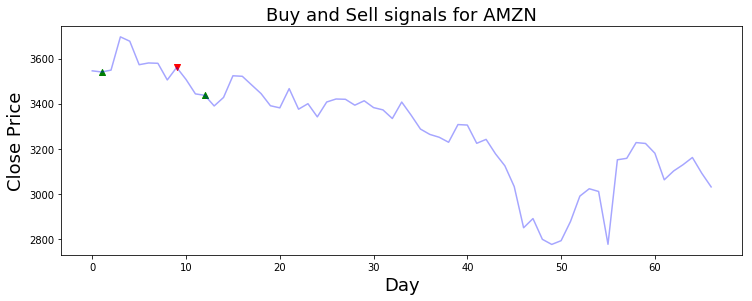

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





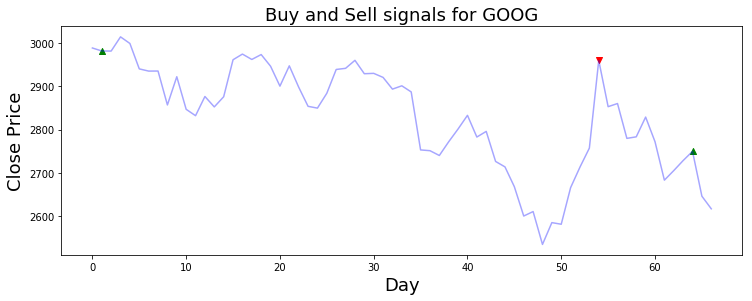

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





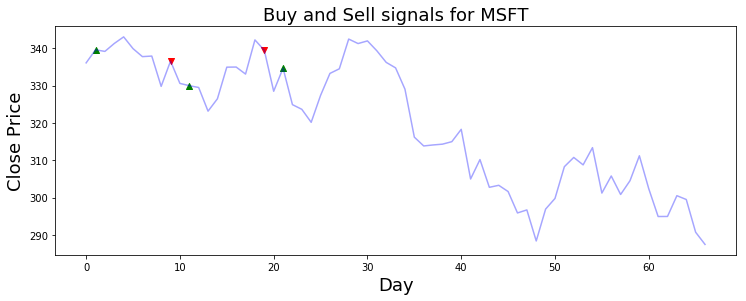

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





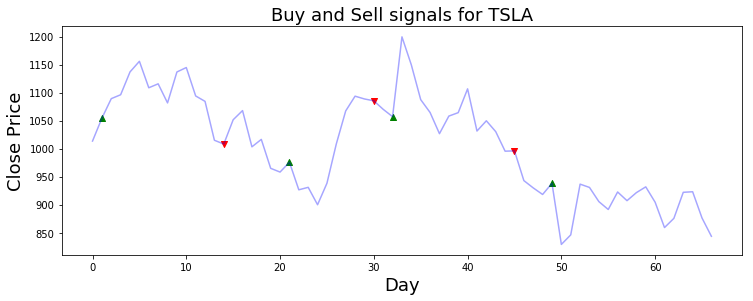

In [ ]:
current_money = 10000
net_lst = []
buy_lst = []
files = ['df_AAPL_365', 'df_AMZN_365', 'df_GOOG_365','df_MSFT_365', 'df_TSLA_365'] 
k = 0
for i in files:
  filepath = "/content/"+i
  df = pd.read_csv(filepath,sep=',',engine='python',error_bad_lines=False, header = [0])
  # print(df.head())
  df = df[len(df)-67:]
  df = df.reset_index()
  df = all_EMA(df, MP, k)
  # print(df.head())
  # print(df['Buy_SMA'].nunique())
  # print(df.Buy.unique())
  # print(df.Sell.unique())

  sell_unique = df.Sell.unique()
  buy_unique = df.Buy.unique()
  # print(buy_unique)
  # print(sell_unique)
  buy_index = 0
  sell_index = 0
  net = 0
  correction = 0

  # for i in range(2*min(len(buy_unique), len(sell_unique))):
  #   if buy_unique[buy_index]!= np.nan:
  #     net = net - buy_unique[buy_index]
  #     buy_index = buy_index + 1
  #   elif sell_unique[sell_index]!= np.nan:
  #     net = net + sell_unique[sell_index]
  #     sell_index = sell_index + 1
  # if buy_index!=len(buy_unique):
  #   net = net - buy_unique[buy_index:]
  # elif sell_index!=len(sell_unique):
  #   net = net + sell_unique[sell_index:]

  df['net'] = df.Sell.fillna(0) - df.Buy.fillna(0)
  # net_lst.append(df['net'].sum())
  # net_lst.append(net)
  if len(df.Sell.unique())< len(df.Buy.unique()):
    correction+= df.Buy.unique()[len(df.Sell.unique()):]
  elif len(df.Sell.unique())> len(df.Buy.unique()):
    correction-= df.Sell.unique()[len(df.Buy.unique()):]
  # buy_lst.append(df.Buy.unique()[-1])
  current_money = current_money + df['net'].sum() + correction #+ df.Buy.unique()[-1]
  net_lst.append(df['net'].sum() + correction)
  # print(df['net'].sum() + correction)
  # print(df.Buy.unique()[-1])
  # print(df.sum(axis=1,skipna=True))
  # + df.sum(axis=1, skipna=True)[-1]
  plt.figure(figsize=(12.2, 4.2))
  title = 'Buy and Sell signals for '+i[3:7]
  plt.title(title, fontsize = 18)
  plt.plot(df['close'], label = 'Close Price', color= 'blue', alpha = 0.35)
  # plt.plot(ShortEMA, label = 'Short EMA', color= 'red', alpha = 0.35)
  # plt.plot(MiddleEMA, label = 'Medium EMA', color= 'orange', alpha = 0.35)
  # plt.plot(LongEMA, label = 'Long EMA', color= 'green', alpha = 0.35)
  plt.scatter(df.index, df['Buy'], color = 'green', marker = '^', alpha= 1)
  plt.scatter(df.index, df['Sell'], color = 'red', marker = 'v', alpha= 1)
  plt.xlabel('Day', fontsize = 18)
  plt.ylabel('Close Price', fontsize = 18)
  plt.show()
  k = k+1

In [ ]:
print('Initial amount in purse : 10000')
for i, f in enumerate(files):
  temp = net_lst[i]
  # print(type(temp))
  if type(temp).__module__ == np.__name__:
    temp = temp.flat[0]
  print('Net Gain/Loss for', f[3:7], ':', temp)#+ buy_lst[i])
print('Current amount in purse after 5 month of backtesting :',current_money)

Initial amount in purse : 10000
Net Gain/Loss for AAPL : 15.210000000000008
Net Gain/Loss for AMZN : 19.980000000000018
Net Gain/Loss for GOOG : -21.730000000000018
Net Gain/Loss for MSFT : 6.430000000000007
Net Gain/Loss for TSLA : 2.4101000000001704
Current amount in purse after 5 month of backtesting : [10022.3001]


# Description of baselines, results, proposed strategy and scope for improvement:

Surprisingly, the two-point simple moving average (SMA) gave better results than the two-point exponential moving average (EMA). 

Sometimes the EMA will react quickly, causing a trader to get out of a trade on a market hiccup. At the same time, the slower-moving SMA keeps the person in the business, resulting in a more significant profit after the hiccup is finished. At other times, the opposite could happen. The faster-moving EMA signals trouble quicker than the SMA, so the EMA trader gets out of harm's way faster, saving that person time and money.

EMA sensed a momentary hiccup for the TSLA stock resulting in the trader selling the stock. However, SMA reacted slower, which resulted in the trader keeping the stock for more extended periods and getting more significant profits. A similar case (but considerable loss) happened with the subject of AMZN stock.

SMA

Net Gain/Loss for AAPL : 23.580000000000013

Net Gain/Loss for AMZN : -75.32000000000016

Net Gain/Loss for GOOG : -15.684999999999945

Net Gain/Loss for MSFT : 8.090000000000032

Net Gain/Loss for TSLA : 316.26

EMA

Net Gain/Loss for AAPL : -3.1899999999999977

Net Gain/Loss for AMZN : -321.4499999999998

Net Gain/Loss for GOOG : 99.48000000000002

Net Gain/Loss for MSFT : 23.620000000000005

Net Gain/Loss for TSLA : 141.65999999999997

Prophet and STL were the other baselines which were tried out.

After backtesting, Prophet was able to predict the closing price with a low error.

For example, 

Predicted price on 02/08/2022- 186.201645

Actual stock on 02/08/2022 - 174.8

The graph learned by Prophet shows that the stock price is expected to increase in the long run (which makes sense with respect to the general upward trend for the first seven months). However, we are not using Prophet as a part of our proposed strategy because it could not learn from short-term hiccups for the stocks. 

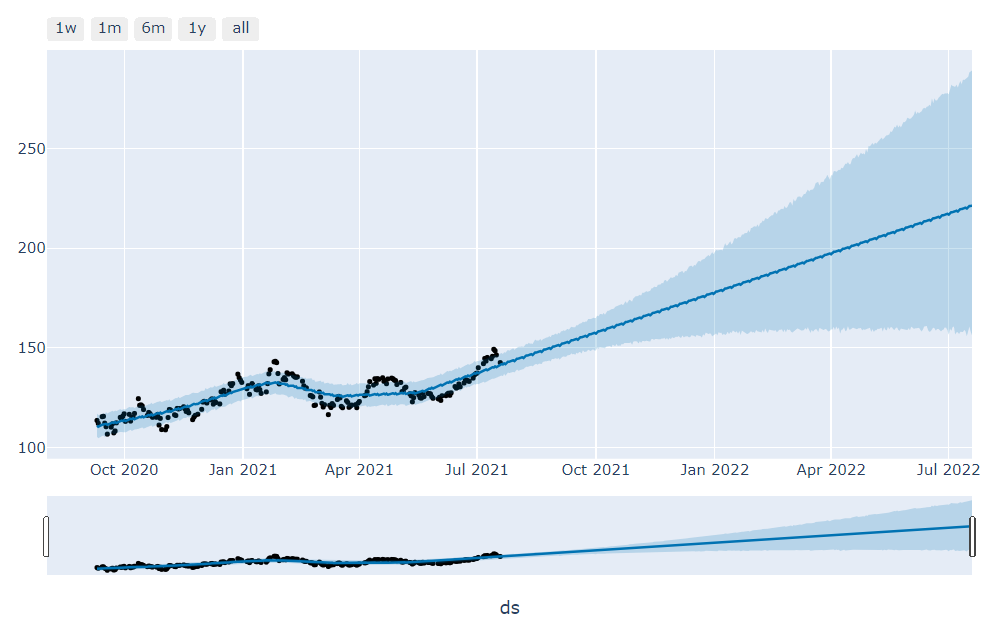

We also tried out stochRSI, which is an indicator of overbought and oversold stocks.

If the stochRSI is greater than 0.8, it means the stock is overbought, and it is an excellent time to sell to get profits. If the stochRSI is less than 0.2, it means the stock is oversold, and it is an excellent time to buy as the price is lower.

Our proposed strategy 1 uses three exponential moving averages -

We buy the stock when the medium moving average crosses below the long moving average, and the short moving average crosses below the medium. We sell the stock when the short moving average crosses above the middle moving average. After empirical analysis, the period of short moving average was chosen as one week, the medium moving average was selected as three weeks, and the long moving average was calculated for nine weeks.

The short and long flags tell which portion of the strategy we are in.
(If we buy a stock, we have to sell it before buying again.) If the conditions are not met, we do not buy/sell the stock.

Net Gain/Loss for AAPL : 8.516500000000093

Net Gain/Loss for AMZN : -269.1700000000001

Net Gain/Loss for GOOG : 183.9699999999998

Net Gain/Loss for MSFT : -0.5999999999999659

Net Gain/Loss for TSLA : 246.6600000000003

There is a net gain of $169.3765 (1.69%). 

Our proposed strategy 2 using three exponential moving averages and StochRSI-

In the second proposed strategy, we use the concept in proposed strategy 1 and the stochRSI. After empirical analysis, the optimum stochRSI cutoff to sell was fixed at 0.75 and the stochRSI cutoff to buy was chosen as 0.25.

Net Gain/Loss for AAPL : 18.018299999999954

Net Gain/Loss for AMZN : 69.67000000000098

Net Gain/Loss for GOOG : -162.6500000000001

Net Gain/Loss for MSFT : -17.990000000000123

Net Gain/Loss for TSLA : 236.31000000000006

There is a net gain of $143.3583 (1.43%), which is close but slightly lesser than proposed strategy 1. However, this does not directly imply that stochRSI is a wrong choice. stochRSI was able to avoid losses in the case of AMZN (unlike proposed strategy one, which resulted in huge losses.) On the other hand, including stochRSI resulted in a loss for GOOG.

We also experimented with LSTM. We made predictions of the stock price after five days. If it were higher, we would buy. Else, we would sell or hold depending on the price on that day.

LSTM combined with EMA (with more weightage given to EMA) avoided huge losses for all the companies compared to the strategies above. However, the net gains weren't significant either. So, we decided not to adopt this as our final strategy for live trading.

Net Gain/Loss for AAPL : 15.210000000000008

Net Gain/Loss for AMZN : 19.980000000000018

Net Gain/Loss for GOOG : -21.730000000000018

Net Gain/Loss for MSFT : 6.430000000000007

Net Gain/Loss for TSLA : 2.4101000000001704

Summarizing all the strategies in a table,

| Strategy      | Net Gain/Loss | Gain/Loss percentage |
| ----------- | ----------- | ----------- |
| Two-point EMA      | -59.88       | -0.59%       |
| Three-pont EMA   | 169.3765      | +1.69%      |
| Three-pont EMA with stochRSI   | 143.3583        | +1.43%       |
| Three-pont EMA with LSTM  | 22.3001      | +0.22%     |

We decide to move on with three-point EMA as the strategy for live paper trading as it gave the best results.

# Contribution of each team member:

Zhongyi- Collected the data needed, Researched about different stock trading strategies, Implementing the class

Sreejith- Tried out baselines (SMA, EMA, STL, stockRSI, Prophet), Implemented the two proposed strategies, Implementing the class


# Key takeaways from the mini-project

Zhongyi-

The project was a great learning experience with regards to stock trading and the use of anomaly detection and machine learning libraries. It was also a good experience organizing the code into classes, implementing backtesting from scratch and using the Alpaca API.

Sreejith-

Before this mini-project, I didn't have much idea about stock trading, trading strategies, etc. After two weeks of working on the project, I have gained a lot of knowledge, and I have also developed an interest in trading. I have learned about supervised and unsupervised strategies for trading, their benefits and drawbacks. I am also familiarized with using LSTMs. This experience would be helpful while working on many projects in the future in different domains like natural language processing, speech processing, etc.